In [1]:
library(Seurat)
library(tidyverse)
library(patchwork)

Loading required package: SeuratObject

Loading required package: sp


Attaching package: ‘SeuratObject’


The following object is masked from ‘package:base’:

    intersect


── Attaching packages ─────────────────────────────────────── tidyverse 1.3.2 ──
✔ ggplot2 3.4.2     ✔ purrr   0.3.4
✔ tibble  3.2.1     ✔ dplyr   1.1.2
✔ tidyr   1.2.1     ✔ stringr 1.4.1
✔ readr   2.1.2     ✔ forcats 0.5.2
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


In [2]:
obj_other = qs::qread('obj_cb_other_00')
obj_other

An object of class Seurat 
25126 features across 32123 samples within 2 assays 
Active assay: integrated (2000 features, 2000 variable features)
 2 layers present: data, scale.data
 1 other assay present: RNA
 2 dimensional reductions calculated: pca, umap

In [3]:
obj = obj_other

In [4]:
obj %>% `[[` %>% colnames

[1] "orig.ident"                         "nCount_RNA"                        
 [3] "nFeature_RNA"                       "nCount_RNA_SCOP"                   
 [5] "nFeature_RNA_SCOP"                  "Index.10x_SCOP"                    
 [7] "nCount_HTO_SCOP"                    "nFeature_HTO_SCOP"                 
 [9] "Index.HTO_SCOP"                     "nCount_spliced_SCOP"               
[11] "nFeature_spliced_SCOP"              "nCount_unspliced_SCOP"             
[13] "nFeature_unspliced_SCOP"            "HTO_mcl_maxID_SCOP"                
[15] "HTO_mcl_secondID_SCOP"              "HTO_mcl_margin_SCOP"               
[17] "HTO_mcl_classification_SCOP"        "HTO_mcl_classification.global_SCOP"
[19] "hash.mcl.ID_SCOP"                   "doublet_SCOP"                      
[21] "predicted_dub_std_SCOP"             "predicted_dub_cut_SCOP"            
[23] "barcode_SCOP"                       "Index.10x"                         
[25] "barcode"                            "strain"                            
[27] "treatment"                          "time"                              
[29] "collection_date"                    "isolation_date"                    
[31] "batch"                              "integrated_snn_res.0.5"            
[33] "seurat_clusters"                    "class"                             
[35] "integrated_snn_res.0.8"             "labels_lvl1"

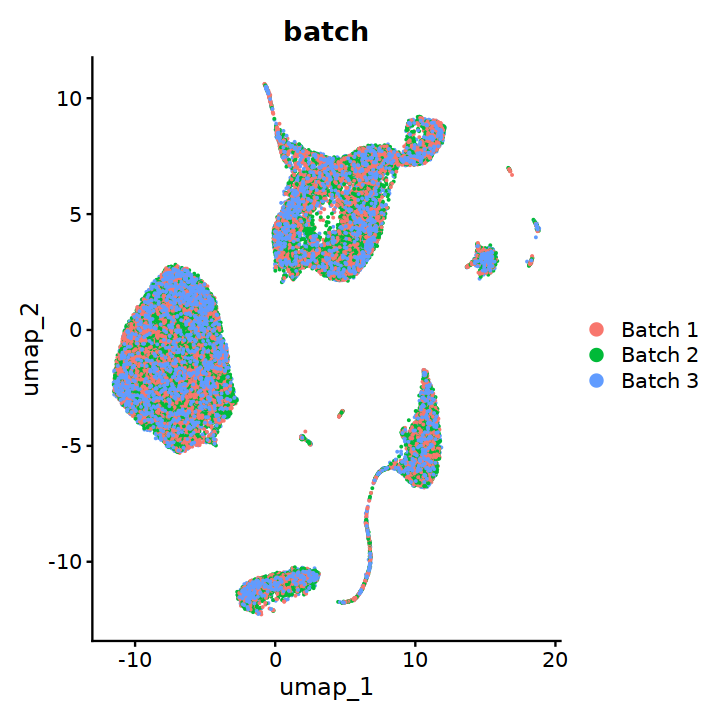

In [5]:
options(repr.plot.width=6, repr.plot.height=6)
DimPlot(obj, reduction = "umap", group.by='batch', label=F, repel = T)

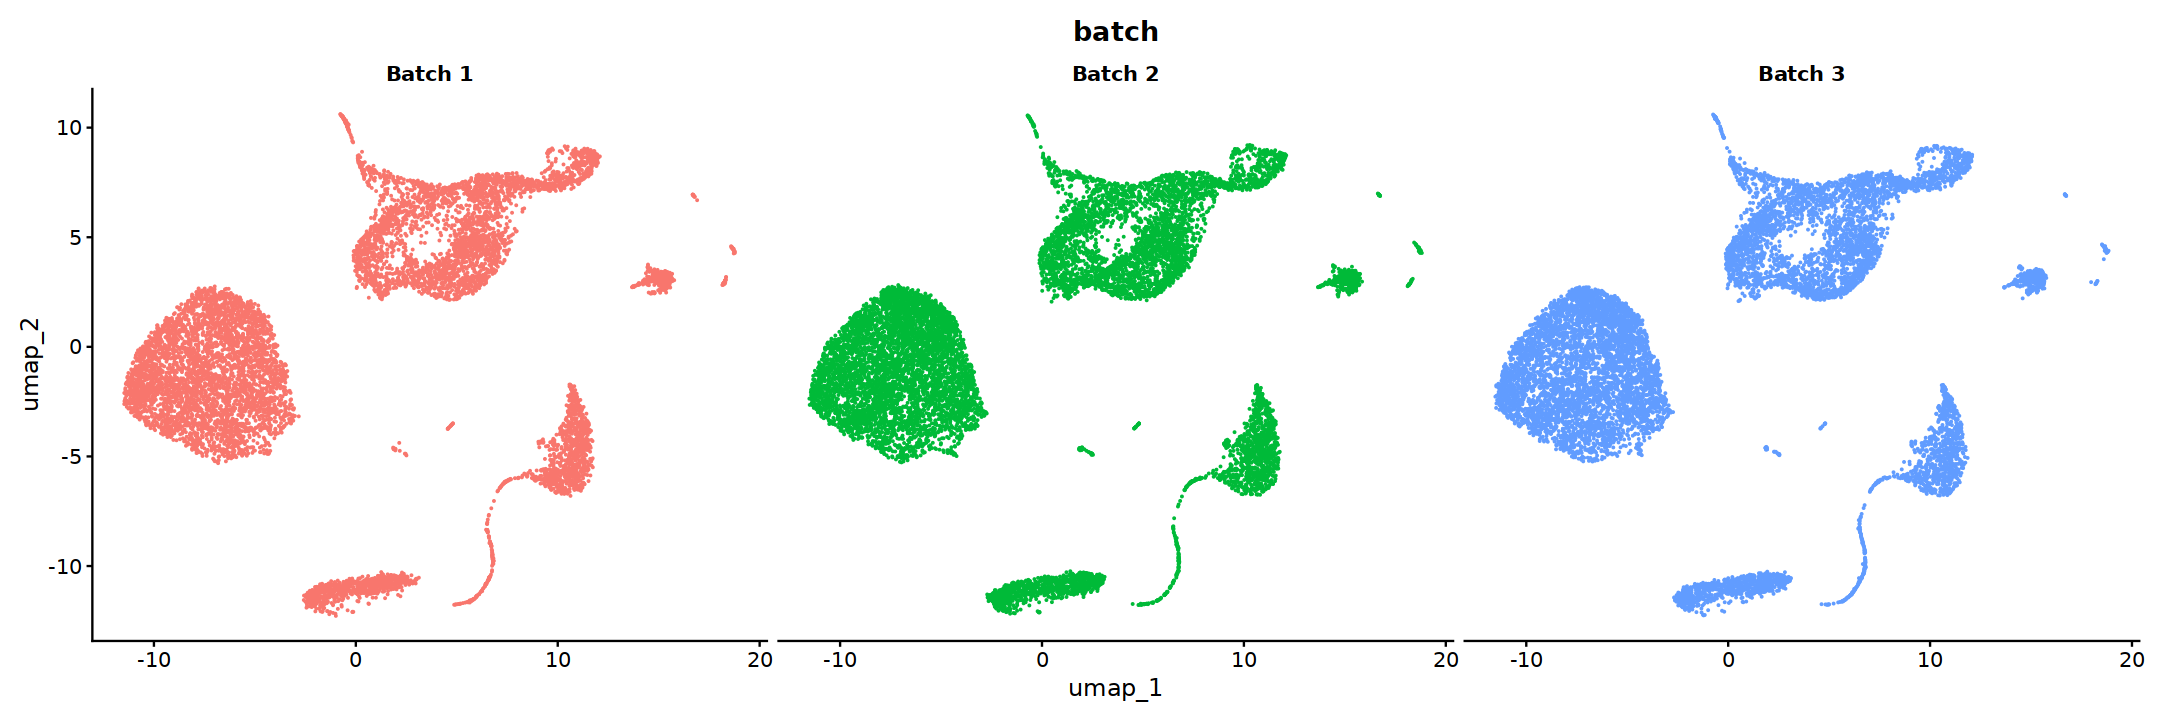

In [6]:
options(repr.plot.width=18, repr.plot.height=6)
DimPlot(obj, reduction = "umap", group.by='batch', split.by='batch', label=F, repel = T) + NoLegend()

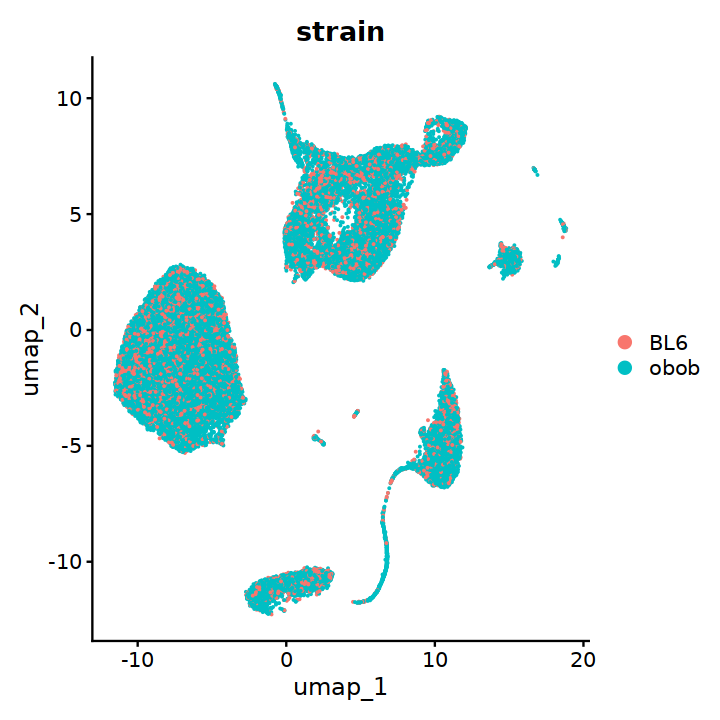

In [7]:
options(repr.plot.width=6, repr.plot.height=6)
DimPlot(obj, reduction = "umap", group.by='strain', label=F, repel = T)

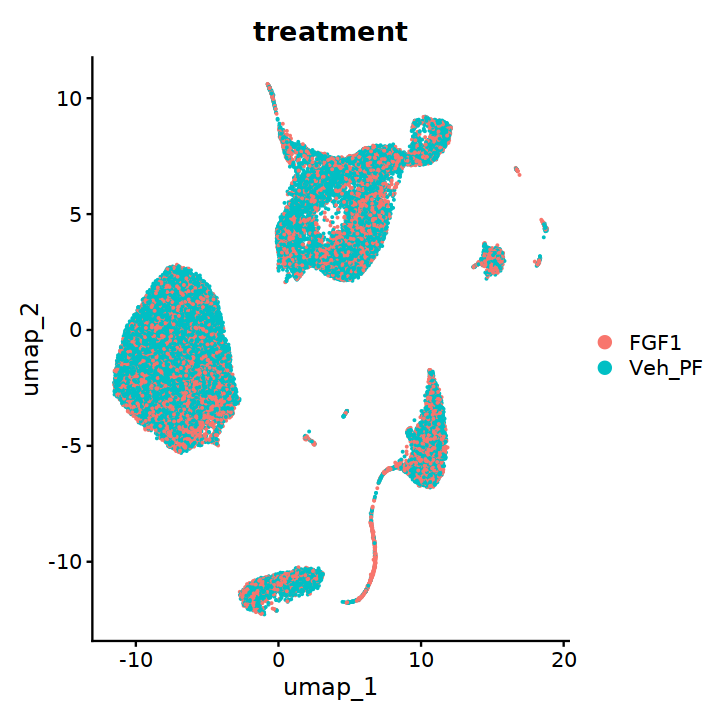

In [8]:
options(repr.plot.width=6, repr.plot.height=6)
DimPlot(obj, reduction = "umap", group.by='treatment', label=F, repel = T)

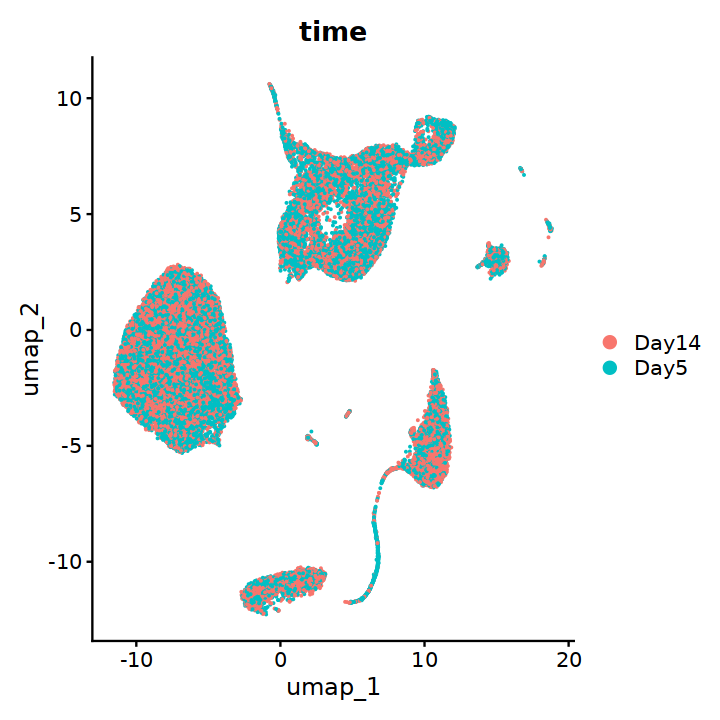

In [9]:
options(repr.plot.width=6, repr.plot.height=6)
DimPlot(obj, reduction = "umap", group.by='time', label=F, repel = T)

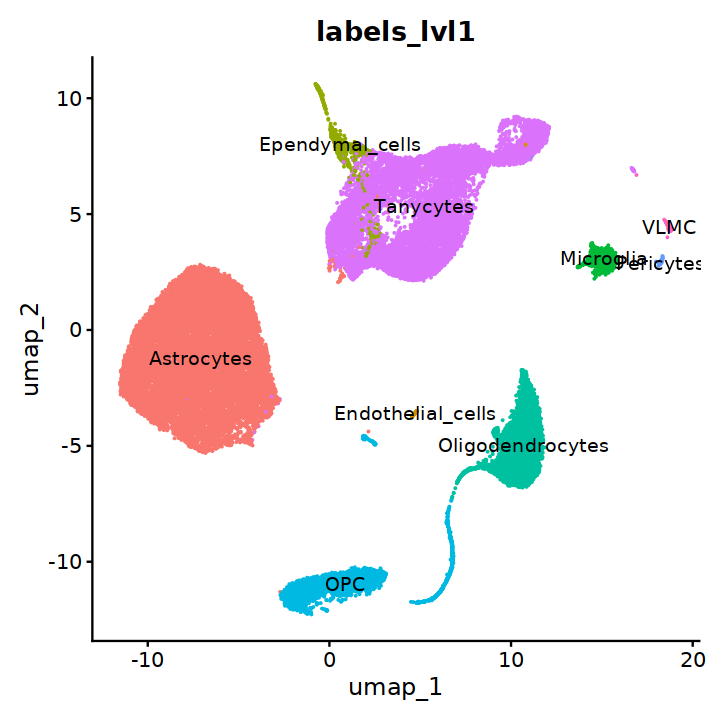

In [10]:
options(repr.plot.width=6, repr.plot.height=6)
DimPlot(obj, reduction = "umap", group.by='labels_lvl1', label=T) + NoLegend()

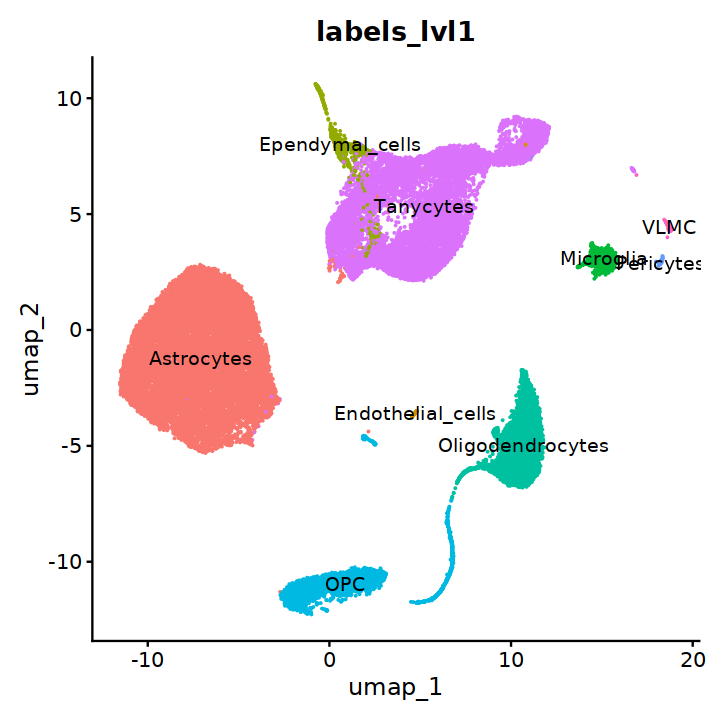

In [11]:
options(repr.plot.width=6, repr.plot.height=6)
DimPlot(obj, reduction = "umap", group.by='labels_lvl1', label=T) + NoLegend()

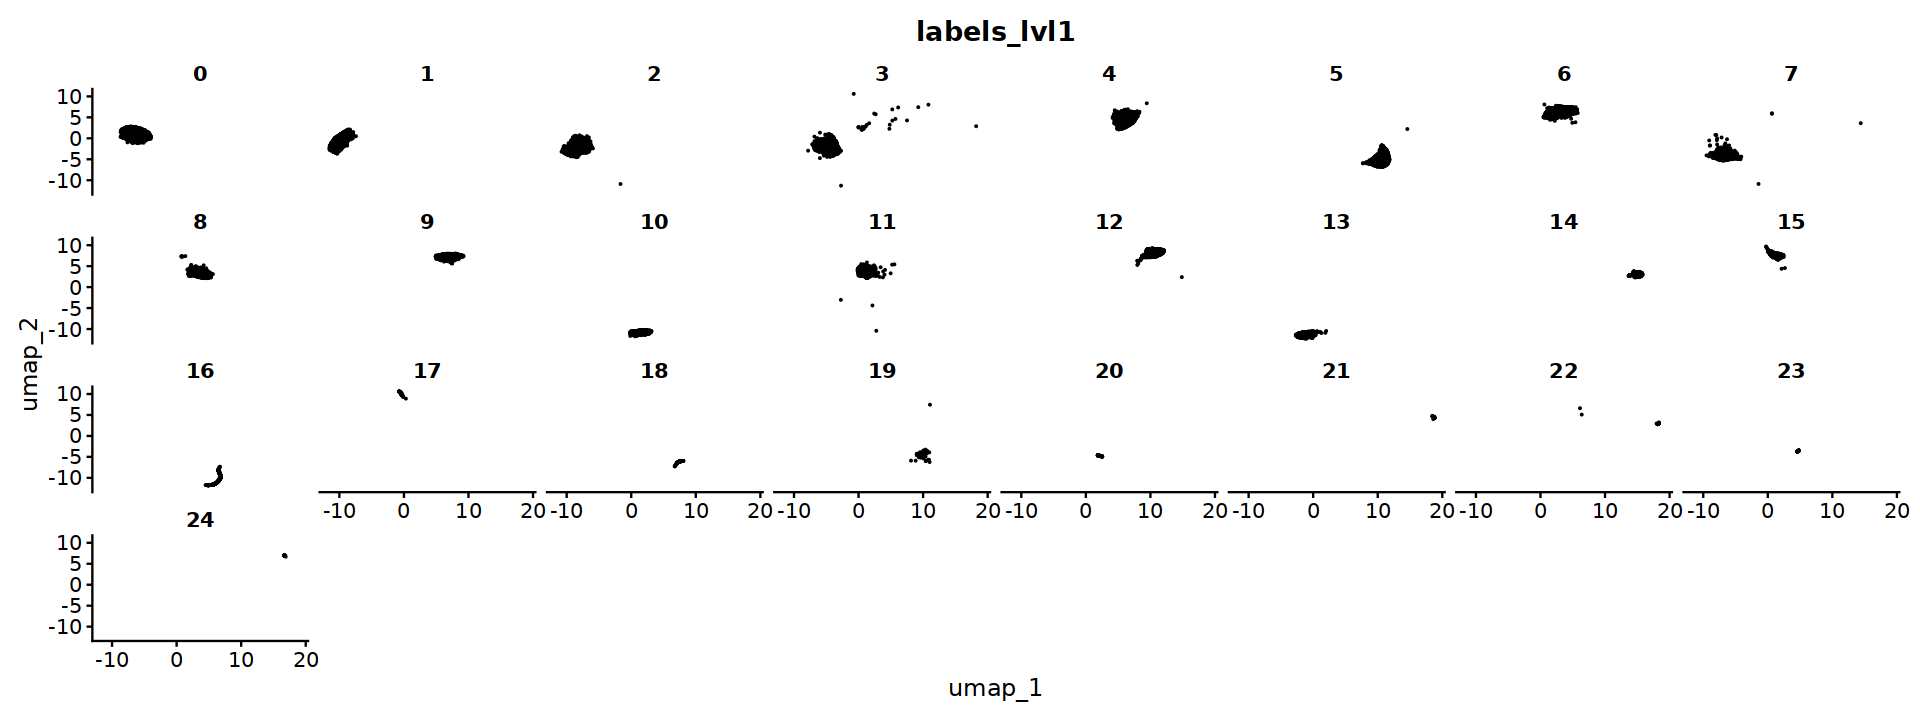

In [12]:
options(repr.plot.width=16, repr.plot.height=6)
DimPlot(obj, reduction = "umap", cols=rep('black', 58), dims=c(1,2), group.by='labels_lvl1', label=F, split.by='seurat_clusters', ncol=8) + NoLegend()

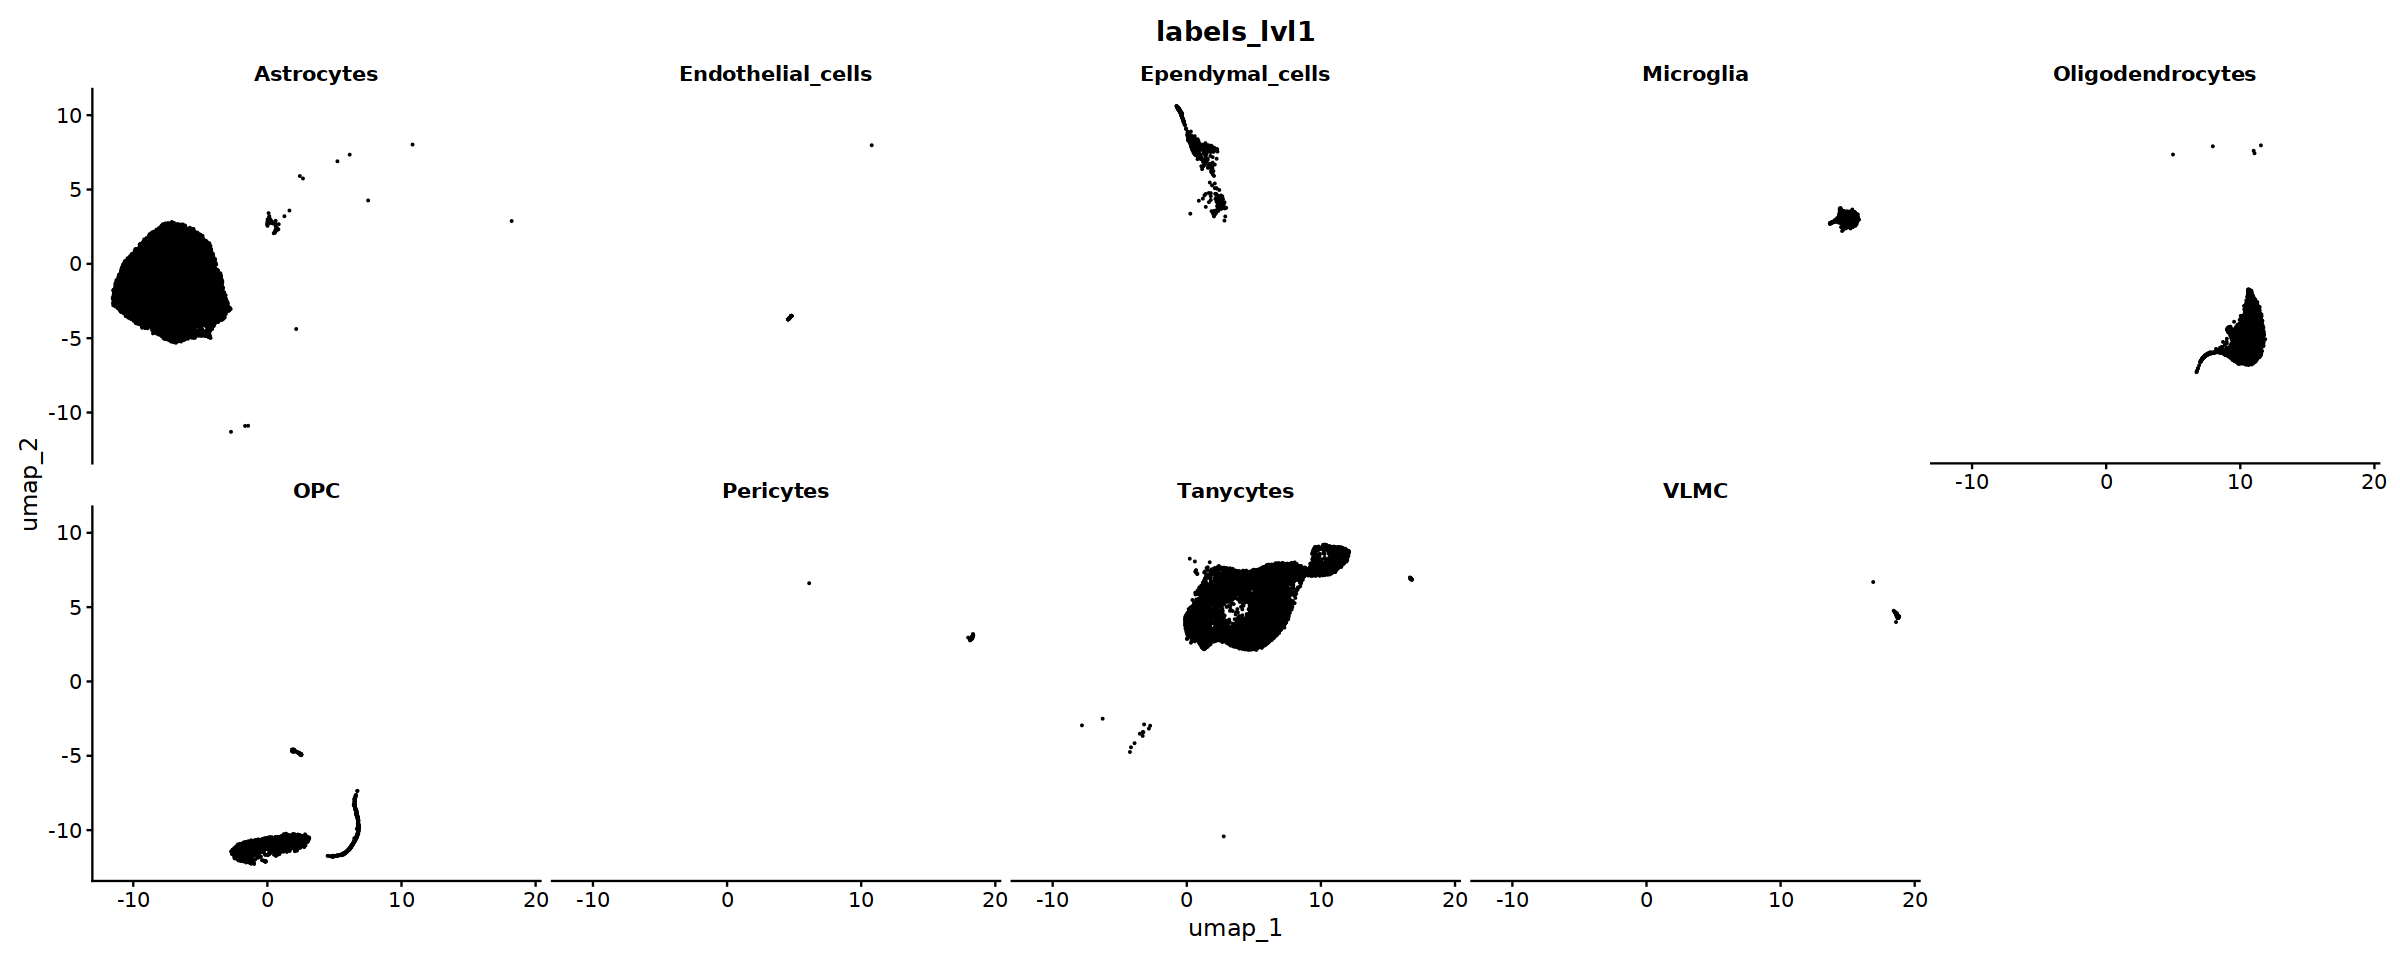

In [13]:
options(repr.plot.width=20, repr.plot.height=8)
DimPlot(obj, reduction = "umap", dims=c(1,2), cols=rep('black', 58), group.by='labels_lvl1', label=F, split.by='labels_lvl1', ncol=5) + NoLegend()

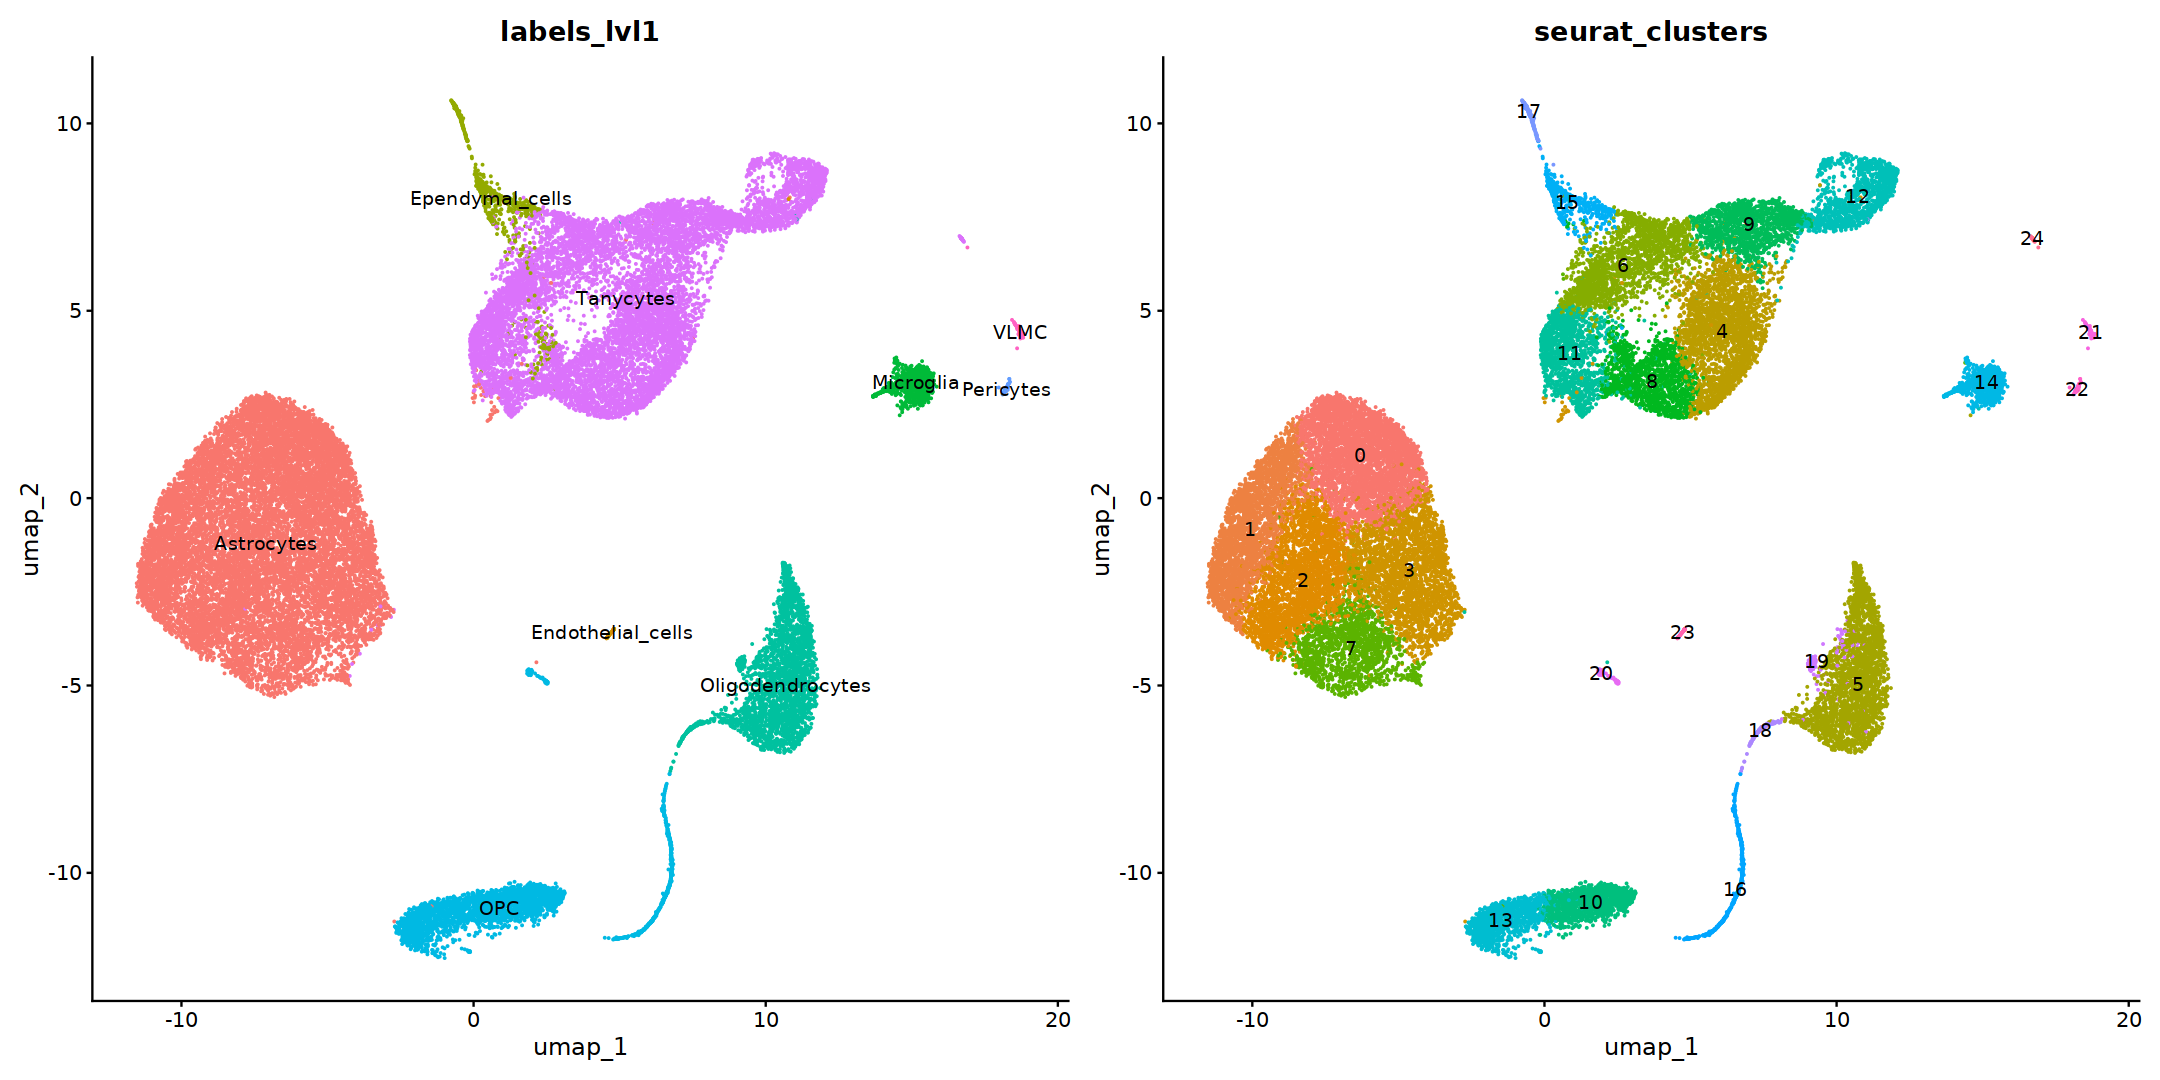

In [14]:
options(repr.plot.width=18, repr.plot.height=9)
p_labels_lvl1 = DimPlot(obj, reduction = "umap", group.by='labels_lvl1', label=T) + NoLegend()
p_seurat_clusters = DimPlot(obj, reduction = "umap", group.by='seurat_clusters', label=T) + NoLegend()
p_labels_lvl1 + p_seurat_clusters

In [15]:
labels_chunk = obj %>%
`[[` %>%
mutate(labels_chunk = case_when(labels_lvl1 %in% c("Ependymal_cells", "Tanycytes") ~ 'g1',
                                labels_lvl1 %in% c("Astrocytes") ~ 'g2',
                                labels_lvl1 %in% c("Oligodendrocytes", "OPC") ~ 'g3',
                                labels_lvl1 %in% c("Microglia") ~ 'g4',
                                labels_lvl1 %in% c("Pericytes") ~ 'g5',
                                labels_lvl1 %in% c("VLMC") ~ 'g6',
                                labels_lvl1 %in% c("Endothelial_cells") ~ 'g7')) %>%
mutate(labels_chunk = case_when(seurat_clusters %in% c(19, 20, 24) ~ 'g_drop',
                                TRUE ~ labels_chunk)) %>%
select(labels_chunk)

labels_chunk %>% qs::qsave('labels_chunk_other.qs')

In [16]:
obj = obj %>% AddMetaData(labels_chunk)

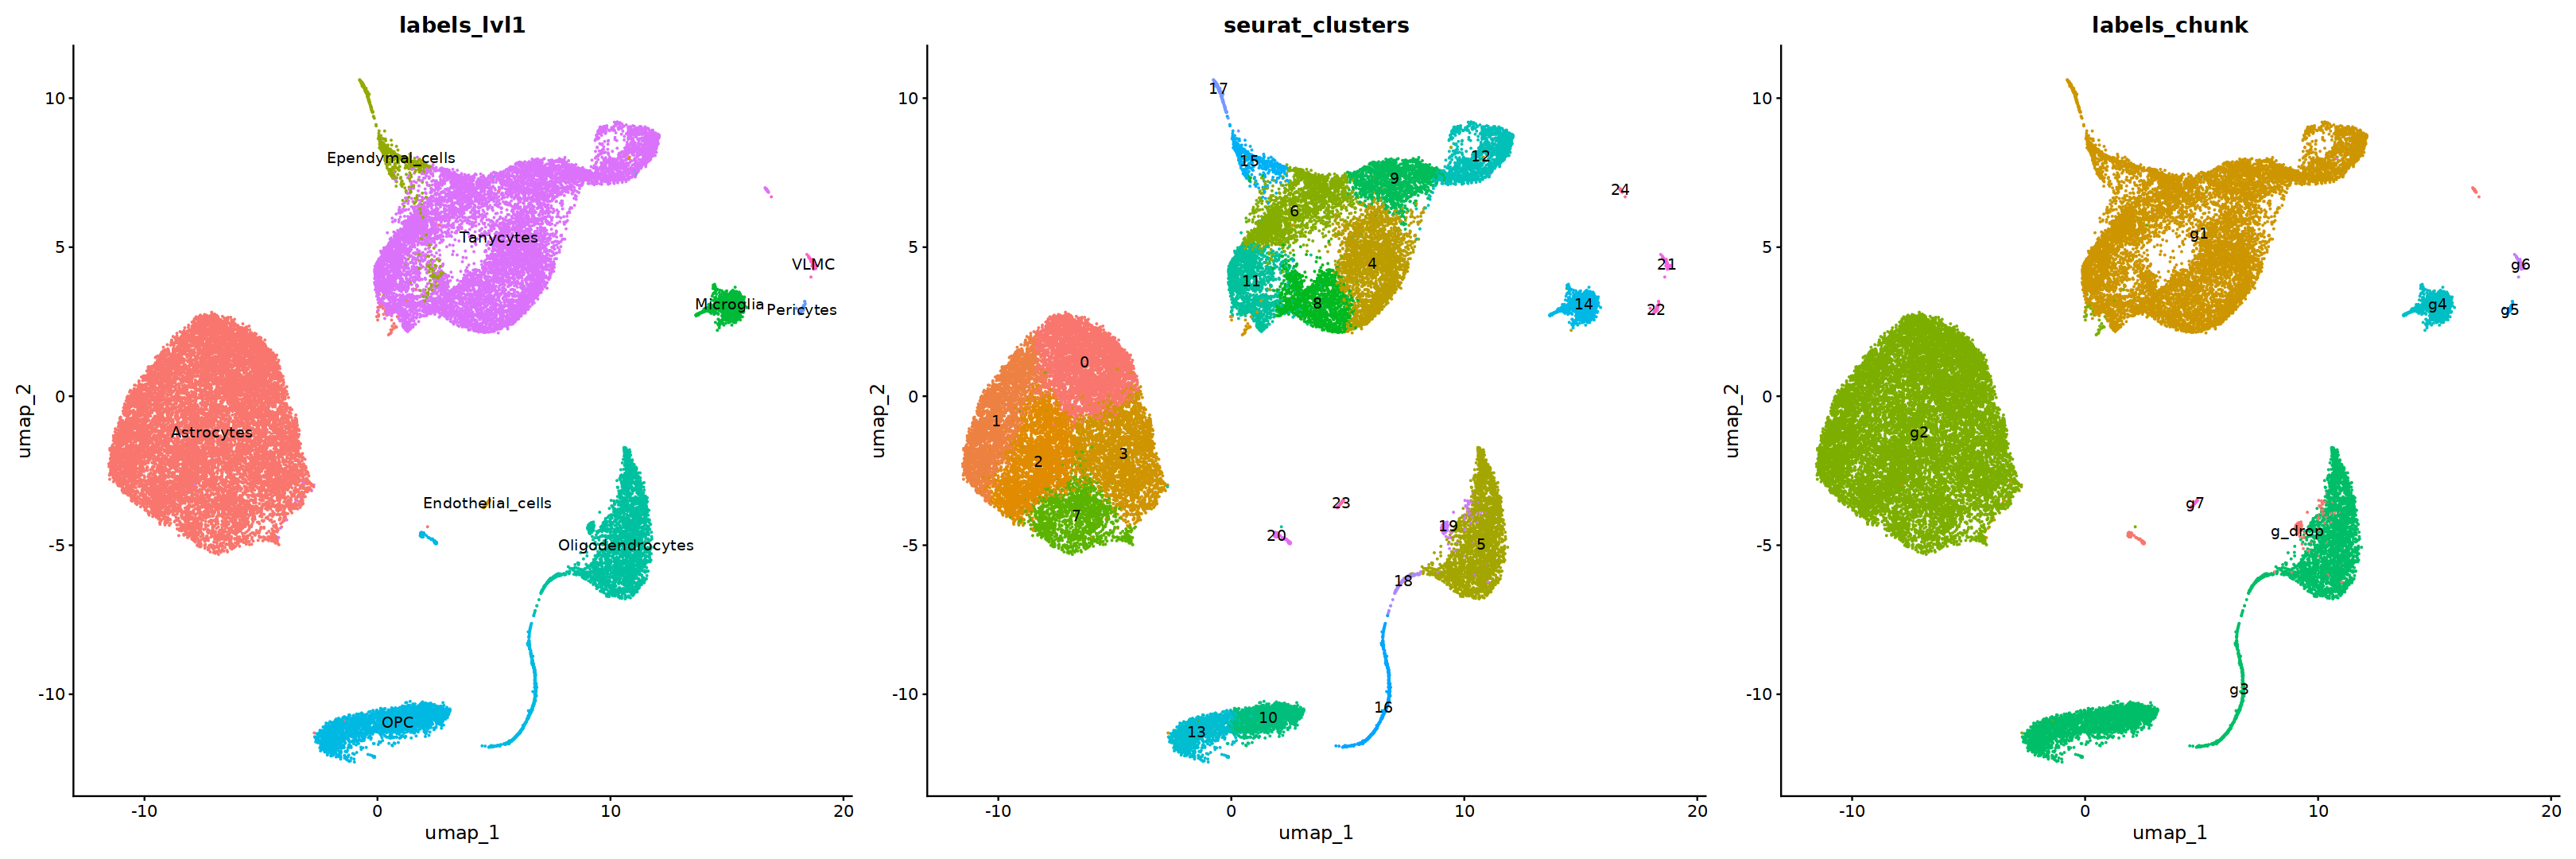

In [17]:
options(repr.plot.width=27, repr.plot.height=9)
p_labels_lvl1 = DimPlot(obj, reduction = "umap", group.by='labels_lvl1', label=T) + NoLegend()
p_seurat_clusters = DimPlot(obj, reduction = "umap", group.by='seurat_clusters', label=T) + NoLegend()
p_labels_chunk = DimPlot(obj, reduction = "umap", group.by='labels_chunk', label=T) + NoLegend()
p_labels_lvl1 + p_seurat_clusters + p_labels_chunk

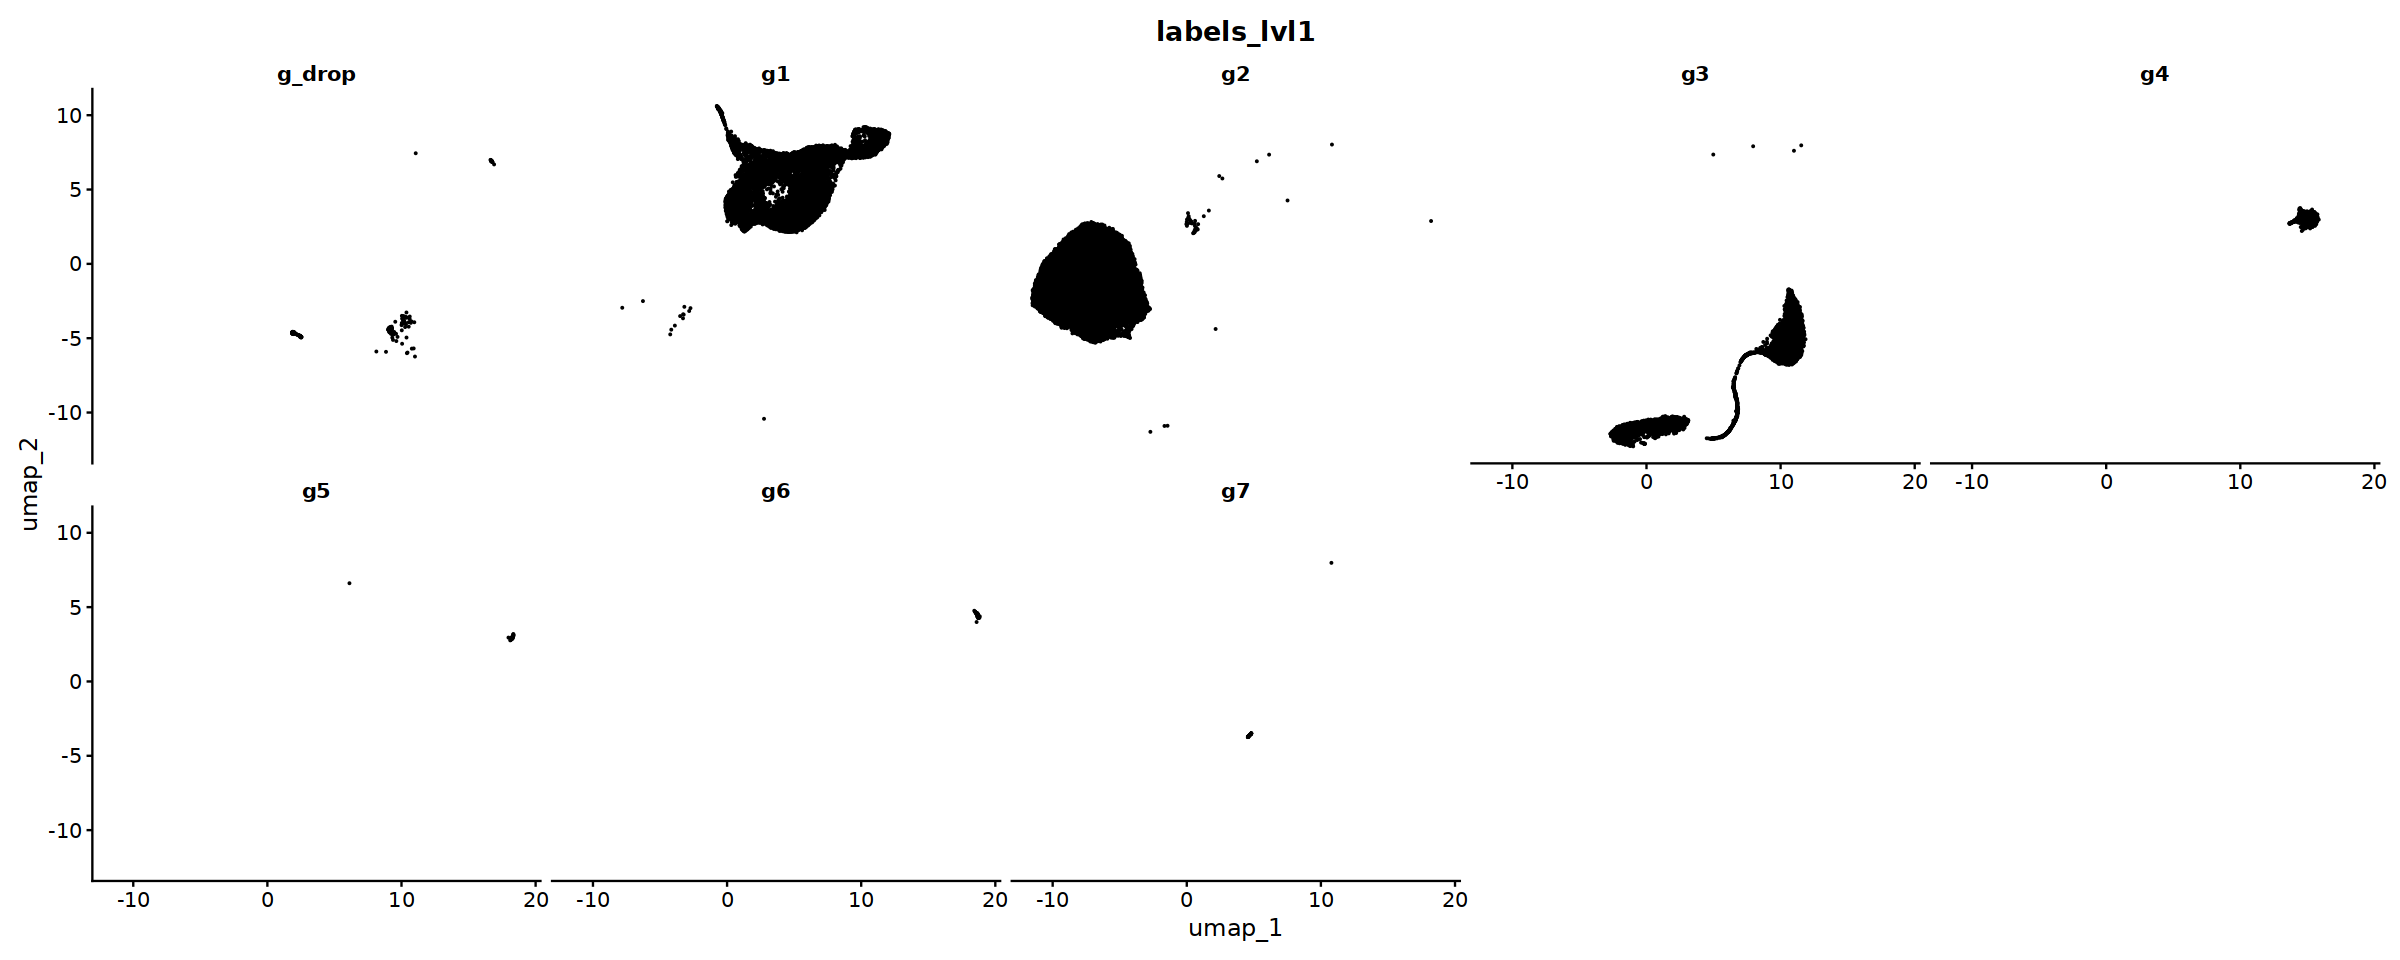

In [18]:
options(repr.plot.width=20, repr.plot.height=8)
DimPlot(obj, reduction = "umap", dims=c(1,2), cols=rep('black', 58), group.by='labels_lvl1', label=F, split.by='labels_chunk', ncol=5) + NoLegend()

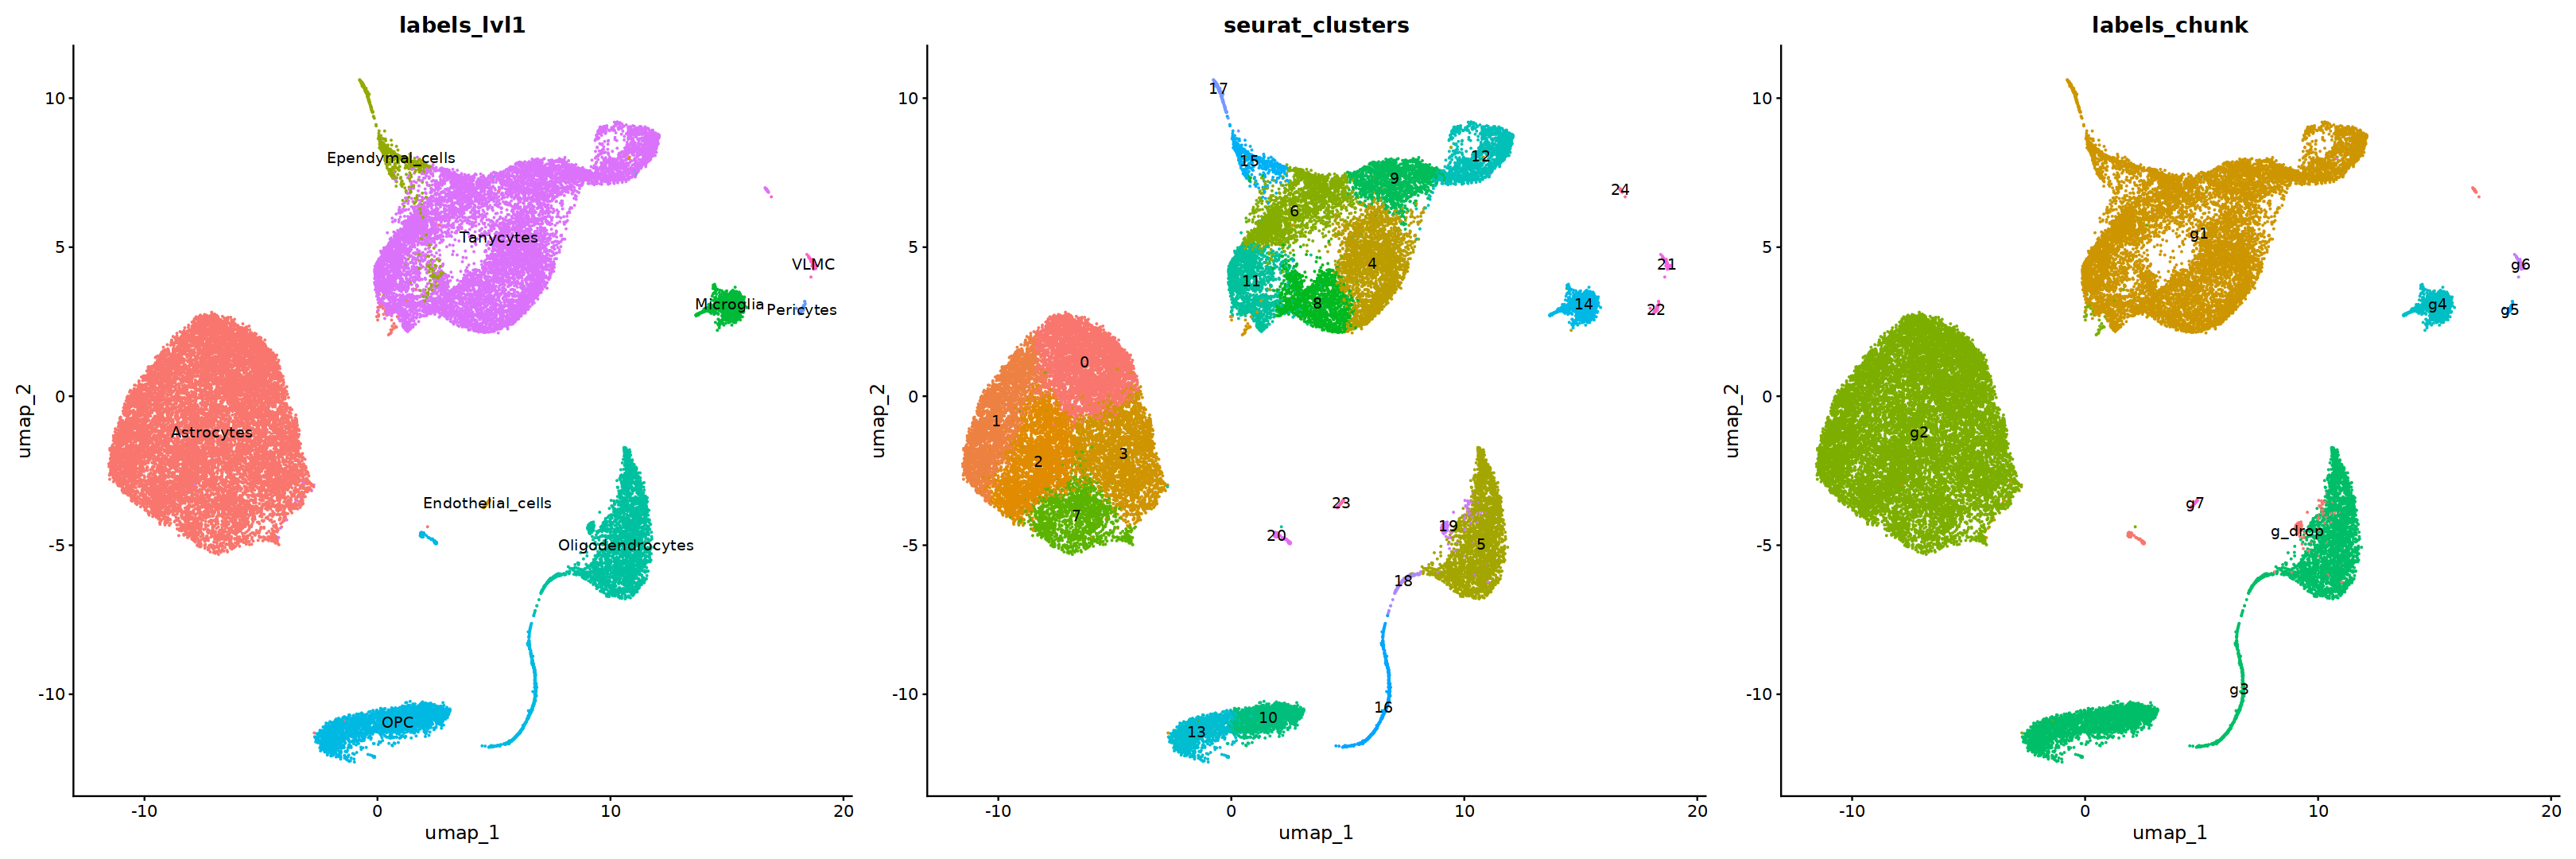

In [19]:
options(repr.plot.width=27, repr.plot.height=9)
p_labels_lvl1 = DimPlot(obj, reduction = "umap", group.by='labels_lvl1', label=T) + NoLegend()
p_seurat_clusters = DimPlot(obj, reduction = "umap", group.by='seurat_clusters', label=T) + NoLegend()
p_labels_chunk = DimPlot(obj, reduction = "umap", group.by='labels_chunk', label=T) + NoLegend()
p_labels_lvl1 + p_seurat_clusters + p_labels_chunk

In [20]:
obj %>% `[[` %>% colnames

[1] "orig.ident"                         "nCount_RNA"                        
 [3] "nFeature_RNA"                       "nCount_RNA_SCOP"                   
 [5] "nFeature_RNA_SCOP"                  "Index.10x_SCOP"                    
 [7] "nCount_HTO_SCOP"                    "nFeature_HTO_SCOP"                 
 [9] "Index.HTO_SCOP"                     "nCount_spliced_SCOP"               
[11] "nFeature_spliced_SCOP"              "nCount_unspliced_SCOP"             
[13] "nFeature_unspliced_SCOP"            "HTO_mcl_maxID_SCOP"                
[15] "HTO_mcl_secondID_SCOP"              "HTO_mcl_margin_SCOP"               
[17] "HTO_mcl_classification_SCOP"        "HTO_mcl_classification.global_SCOP"
[19] "hash.mcl.ID_SCOP"                   "doublet_SCOP"                      
[21] "predicted_dub_std_SCOP"             "predicted_dub_cut_SCOP"            
[23] "barcode_SCOP"                       "Index.10x"                         
[25] "barcode"                            "strain"                            
[27] "treatment"                          "time"                              
[29] "collection_date"                    "isolation_date"                    
[31] "batch"                              "integrated_snn_res.0.5"            
[33] "seurat_clusters"                    "class"                             
[35] "integrated_snn_res.0.8"             "labels_lvl1"                       
[37] "labels_chunk"

In [21]:
create_freq_df_per_cluster <- function(obj, label_col = 'labels_lvl1') {
    meta = obj %>% `[[`
    meta$labels = meta[[label_col]]
    freq_df <- meta %>%
      group_by(seurat_clusters, labels) %>%
      count() %>%
      group_by(seurat_clusters) %>%
      mutate(freq = n / sum(n)) %>%
      ungroup() %>%
      select(-n) %>%
      spread(key = labels, value = freq, fill = 0)
    freq_df

}

create_freq_df_per_label <- function(obj, label_col = 'labels_lvl1') {
    meta = obj %>% `[[`
    meta$labels = meta[[label_col]]
    freq_df <- meta %>%
      group_by(seurat_clusters, labels) %>%
      count() %>%
      group_by(seurat_clusters) %>%
      mutate(freq = n / sum(n)) %>%
      ungroup() %>%
      select(-n) %>%
      spread(key = seurat_clusters, value = freq, fill = 0)
    freq_df

}



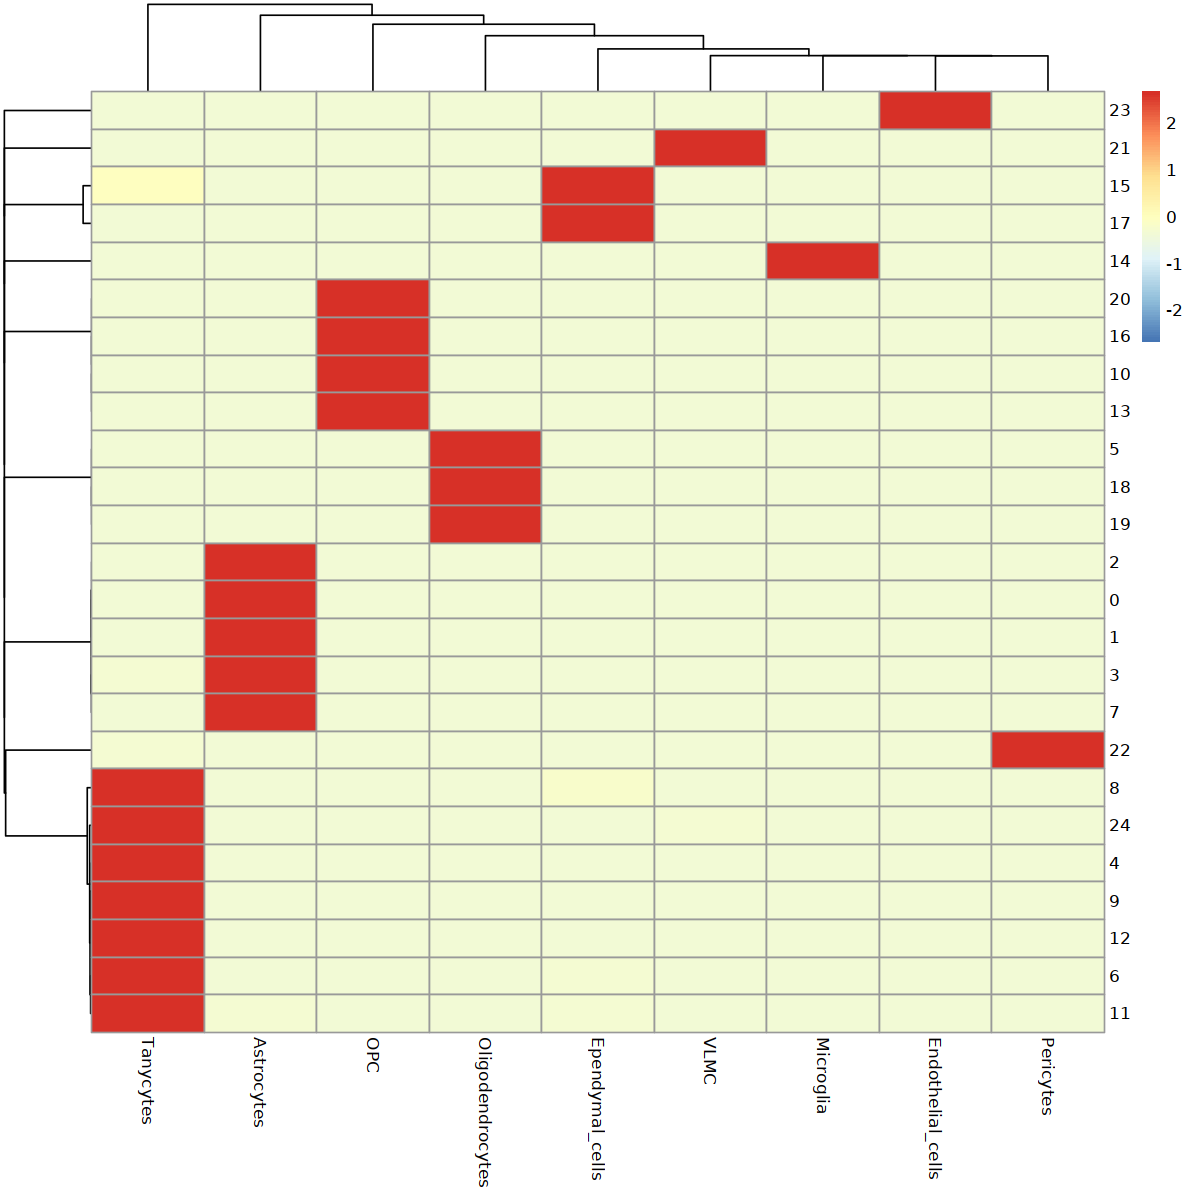

In [22]:
options(repr.plot.width=10, repr.plot.height=10)
freq_df = create_freq_df_per_cluster(obj, label_col='labels_lvl1')


library(pheatmap)
# Prepare the data (remove the first column that contains seurat_clusters names)
data_for_heatmap <- freq_df[,-1]

# Hierarchical clustering
row_dist <- dist(data_for_heatmap, method = "euclidean")
row_clust <- hclust(row_dist, method = "complete")

col_dist <- dist(t(data_for_heatmap), method = "euclidean")
col_clust <- hclust(col_dist, method = "complete")

# Plotting heatmap with dendrograms
pheatmap(data_for_heatmap, 
         cluster_rows = row_clust, 
         cluster_cols = col_clust,
         scale = "row",  # Scaling rows can be helpful for visualization
         show_rownames = TRUE,
         show_colnames = TRUE,
         labels_row = freq_df[,1] %>% pull) # Setting row labels


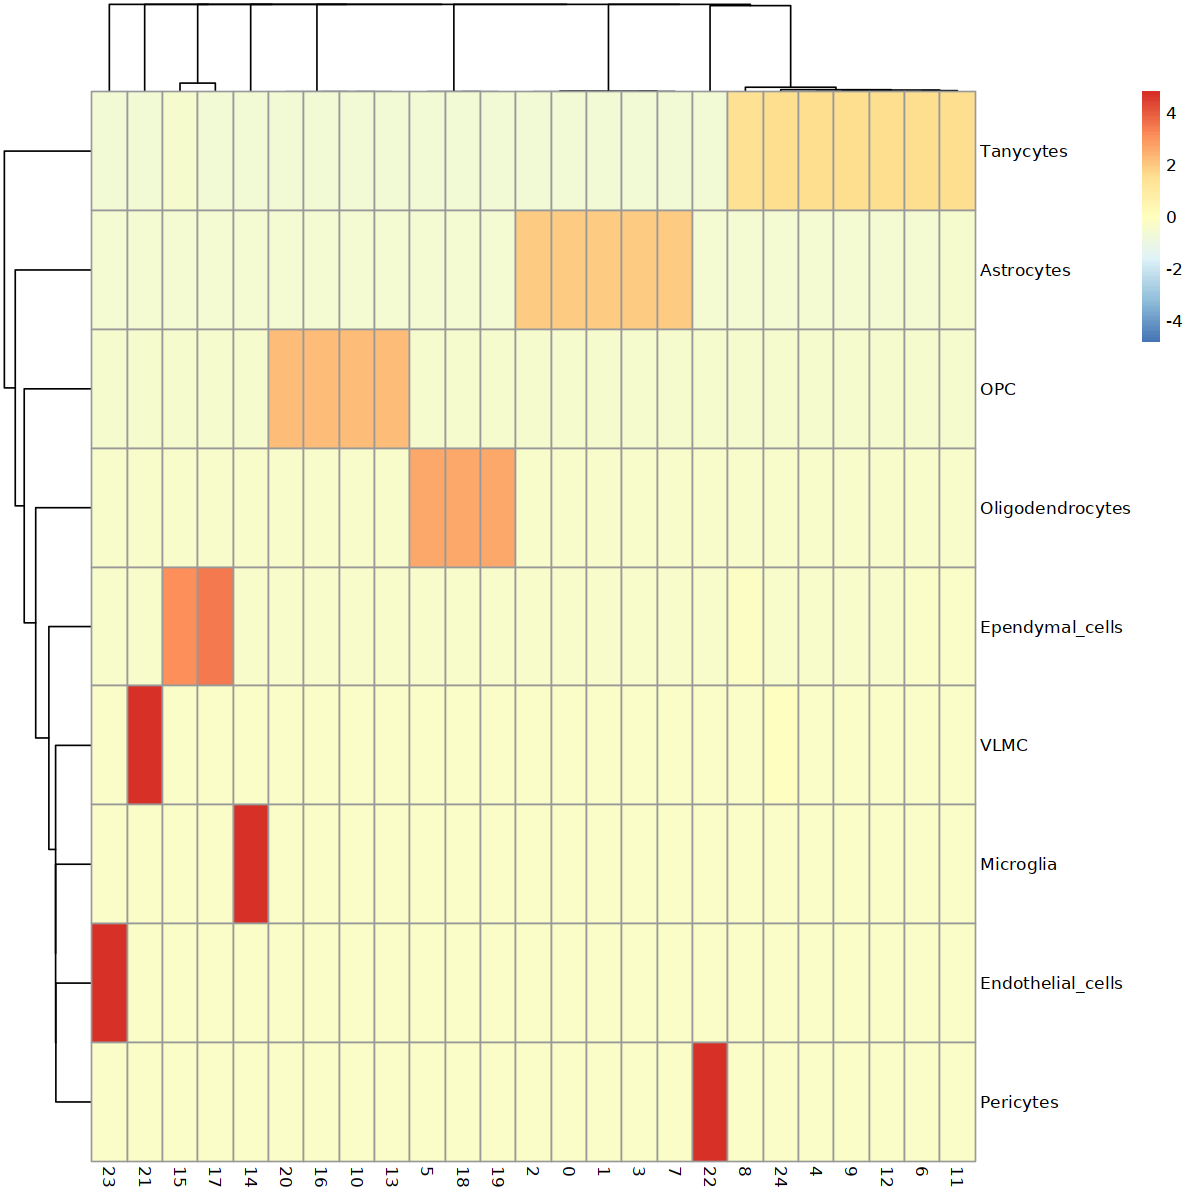

In [23]:
options(repr.plot.width=10, repr.plot.height=10)
freq_df = create_freq_df_per_label(obj, label_col='labels_lvl1')


library(pheatmap)
# Prepare the data (remove the first column that contains seurat_clusters names)
data_for_heatmap <- freq_df[,-1]

# Hierarchical clustering
row_dist <- dist(data_for_heatmap, method = "euclidean")
row_clust <- hclust(row_dist, method = "complete")

col_dist <- dist(t(data_for_heatmap), method = "euclidean")
col_clust <- hclust(col_dist, method = "complete")

# Plotting heatmap with dendrograms
pheatmap(data_for_heatmap, 
         cluster_rows = row_clust, 
         cluster_cols = col_clust,
         scale = "row",  # Scaling rows can be helpful for visualization
         show_rownames = TRUE,
         show_colnames = TRUE,
         labels_row = freq_df[,1] %>% pull) # Setting row labels


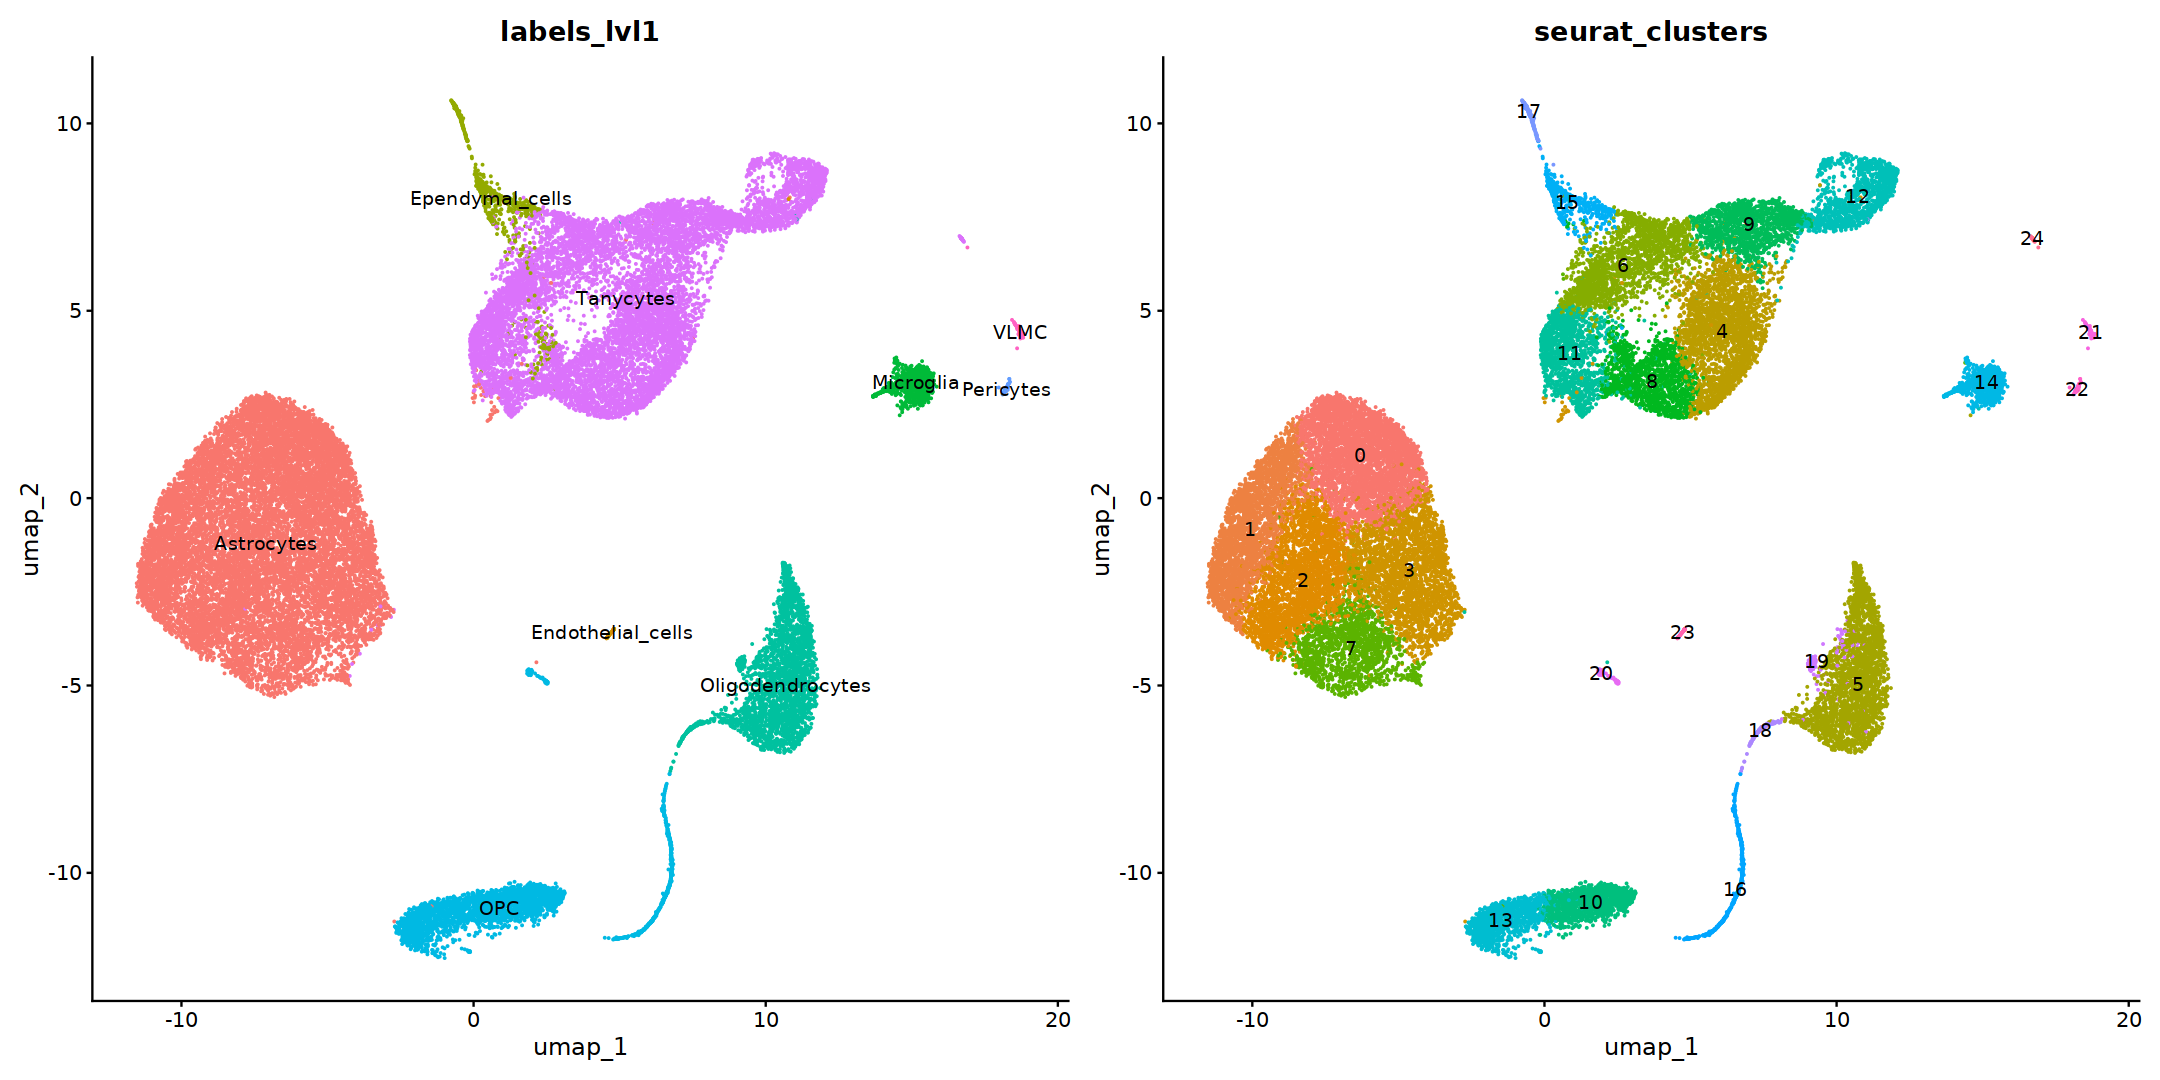

In [24]:
options(repr.plot.width=18, repr.plot.height=9)
p_labels_lvl1 = DimPlot(obj, reduction = "umap", group.by='labels_lvl1', label=T) + NoLegend()
p_seurat_clusters = DimPlot(obj, reduction = "umap", group.by='seurat_clusters', label=T) + NoLegend()
p_labels_lvl1 + p_seurat_clusters

In [25]:
source(paste0("../../00_preprocessing/preprocessing.R"))
source(paste0("../../01_milo/milo.R"))
source(paste0("../cellbender_preprocess.R"))
source("../process_seurat.R")
source("../map_ref.R")

In [26]:
obj_s = obj_other %>% 
subset(subset = labels_lvl1 %in% c("Oligodendrocytes", "OPC")) %>%
subset(subset = seurat_clusters %in% c(13, 10, 16, 19, 18, 5))
obj = obj_s

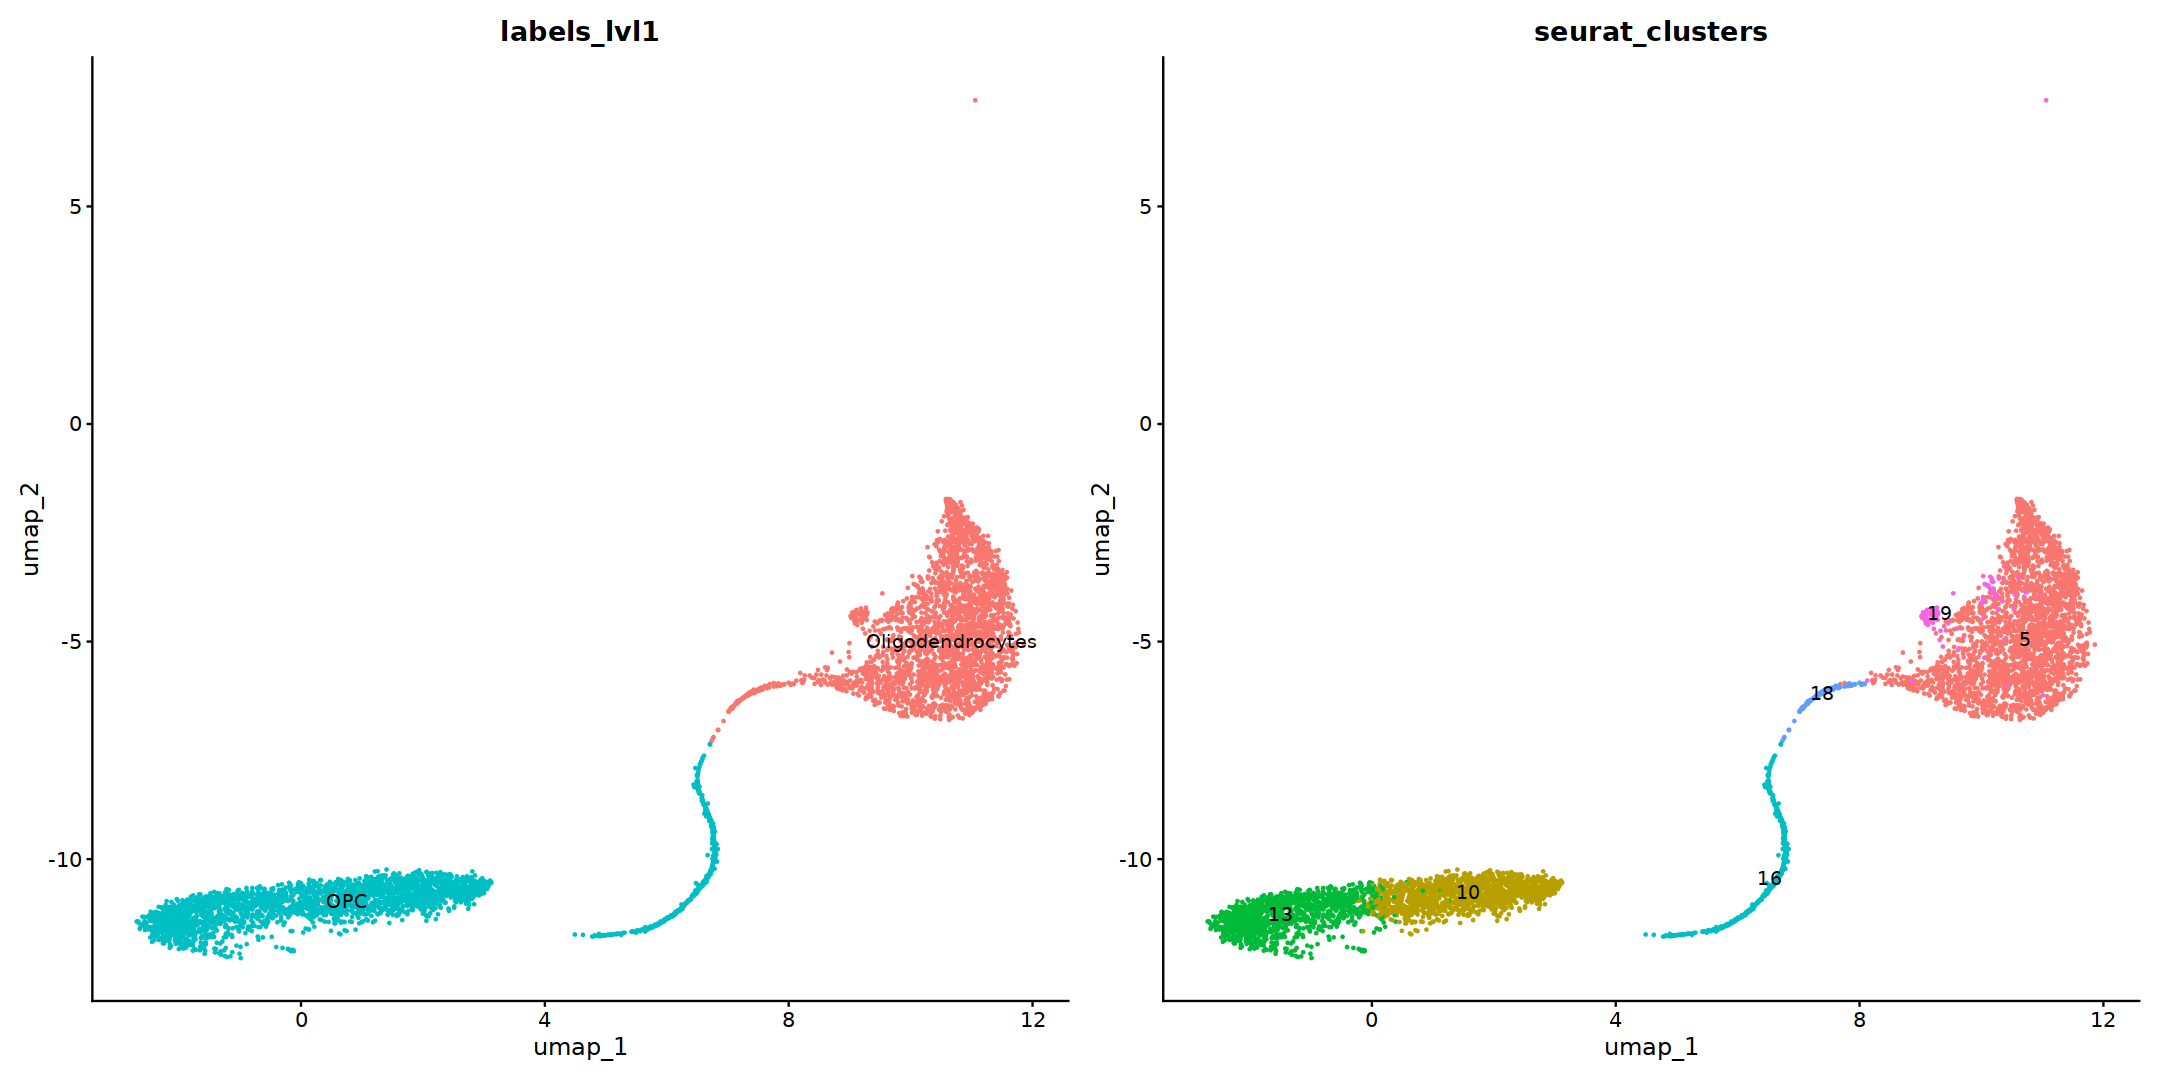

In [27]:
options(repr.plot.width=18, repr.plot.height=9)
p_labels_lvl1 = DimPlot(obj, reduction = "umap", group.by='labels_lvl1', label=T) + NoLegend()
p_seurat_clusters = DimPlot(obj, reduction = "umap", group.by='seurat_clusters', label=T) + NoLegend()
p_labels_lvl1 + p_seurat_clusters

In [28]:
obj_s %>% `[[` %>% distinct(labels_lvl1)

labels_lvl1     
SI-TT-A11_AAACGAAAGCAACAAT Oligodendrocytes
SI-TT-A11_AAACGAAAGGTTCTTG OPC

In [29]:
obj_s$isolation_date = make.names(obj_s$isolation_date)

In [30]:
obj_s = obj_s %>% subset(subset = labels_lvl1 %in% c("Oligodendrocytes", 'OPC'))
obj_s$old_seurat_clusters = obj_s$seurat_clusters
obj_s = obj_s %>%
    reconsitute_rna_seurat %>%
    process_seurat(method = "integrate", nfeats = 10000,
                            batch ="Index.10x_SCOP", 
                            dims = 30, res = 0.8, k.weight=40)

Normalizing layer: counts

Finding variable features for layer counts

Normalizing layer: counts

Finding variable features for layer counts

Normalizing layer: counts

Finding variable features for layer counts

Normalizing layer: counts

Finding variable features for layer counts

Normalizing layer: counts

Finding variable features for layer counts

Normalizing layer: counts

Finding variable features for layer counts

Normalizing layer: counts

Finding variable features for layer counts

Normalizing layer: counts

Finding variable features for layer counts

Normalizing layer: counts

Finding variable features for layer counts

Normalizing layer: counts

Finding variable features for layer counts

Normalizing layer: counts

Finding variable features for layer counts

Normalizing layer: counts

Finding variable features for layer counts

Normalizing layer: counts

Finding variable features for layer counts

Normalizing layer: counts

Finding variable features for layer counts

Warnin

Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 5827
Number of edges: 383584

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8267
Number of communities: 21
Elapsed time: 0 seconds


In [31]:
obj = obj_s

In [32]:
source('../../00_preprocessing/preprocessing.R')

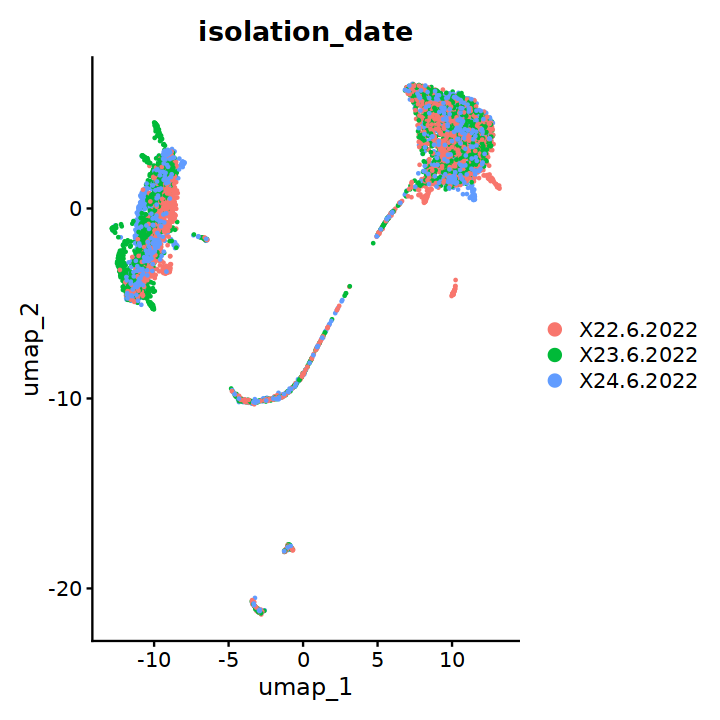

In [33]:
options(repr.plot.width=6, repr.plot.height=6)
DimPlot(obj, reduction = "umap", group.by='isolation_date', label=F, repel = T)

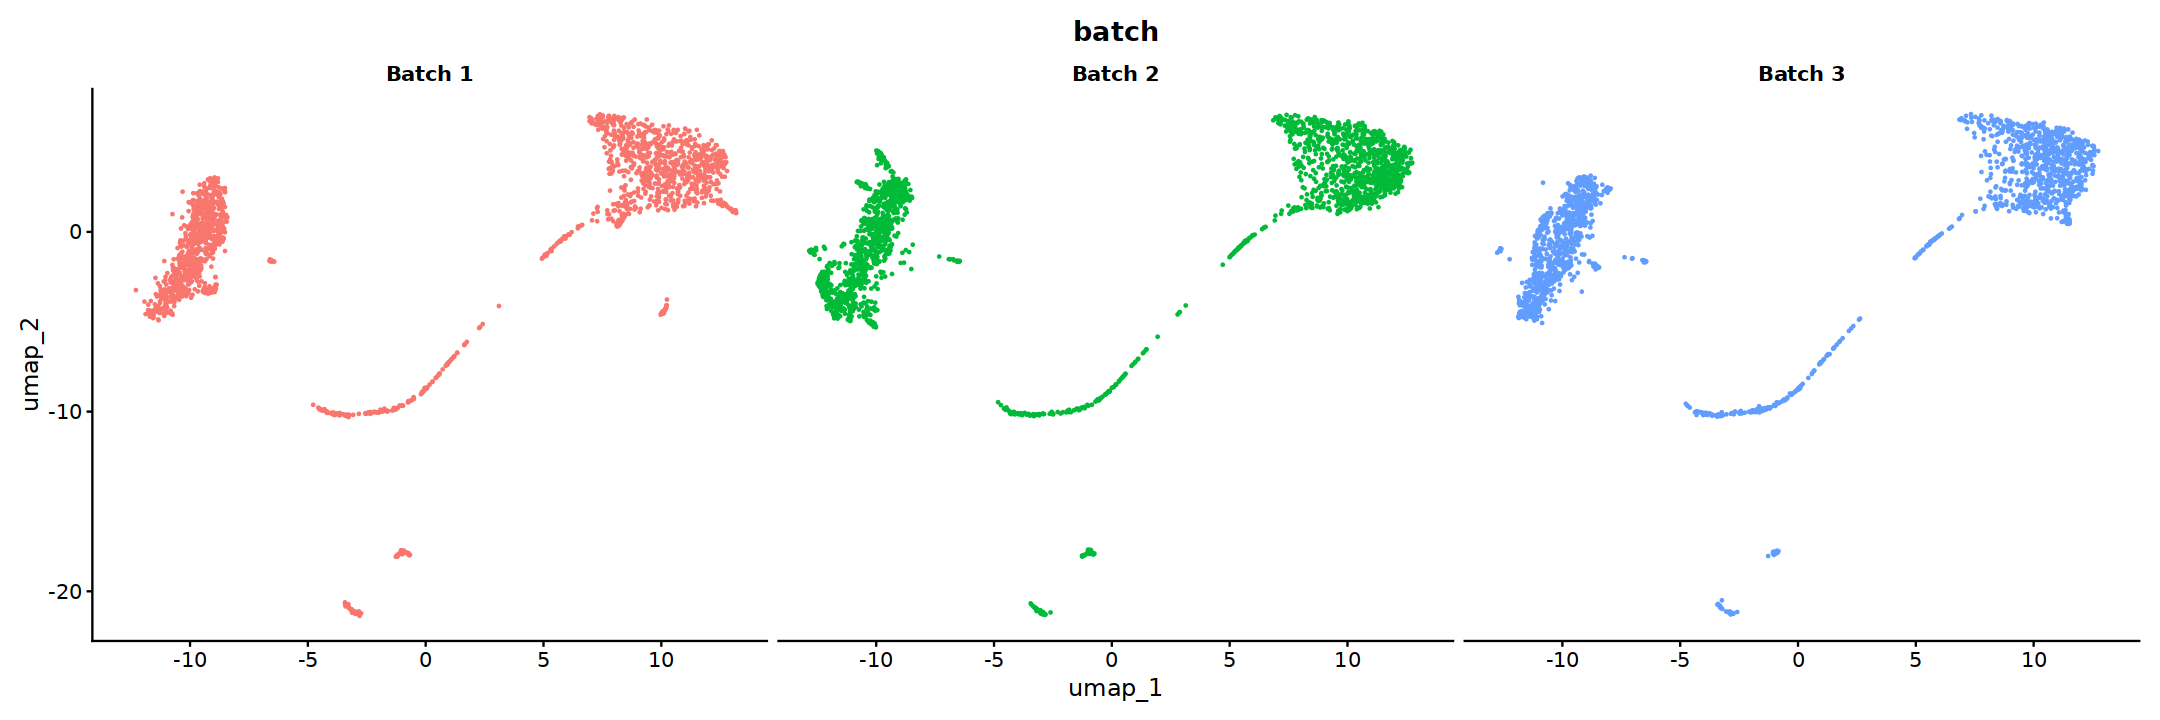

In [34]:
options(repr.plot.width=18, repr.plot.height=6)
DimPlot(obj, reduction = "umap", group.by='batch', split.by='batch', label=F, repel = T) + NoLegend()

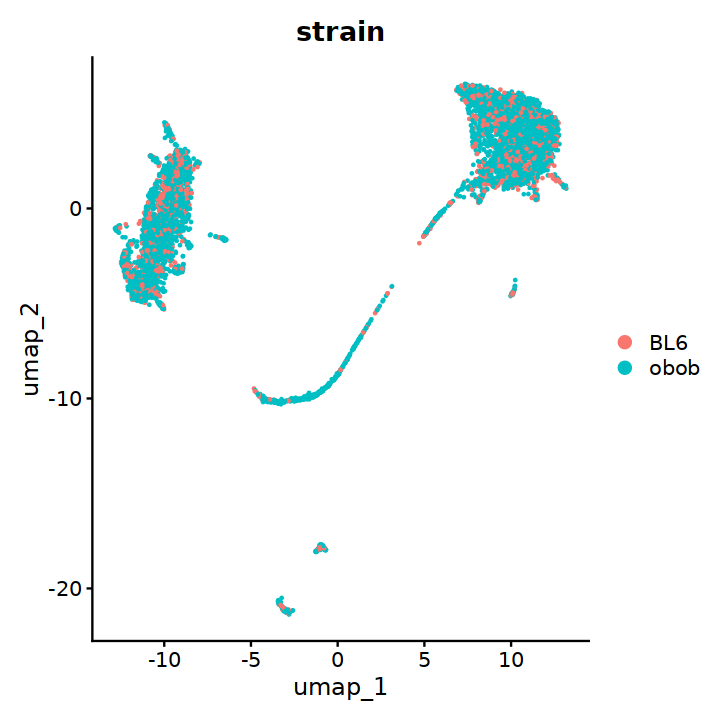

In [35]:
options(repr.plot.width=6, repr.plot.height=6)
DimPlot(obj, reduction = "umap", group.by='strain', label=F, repel = T)

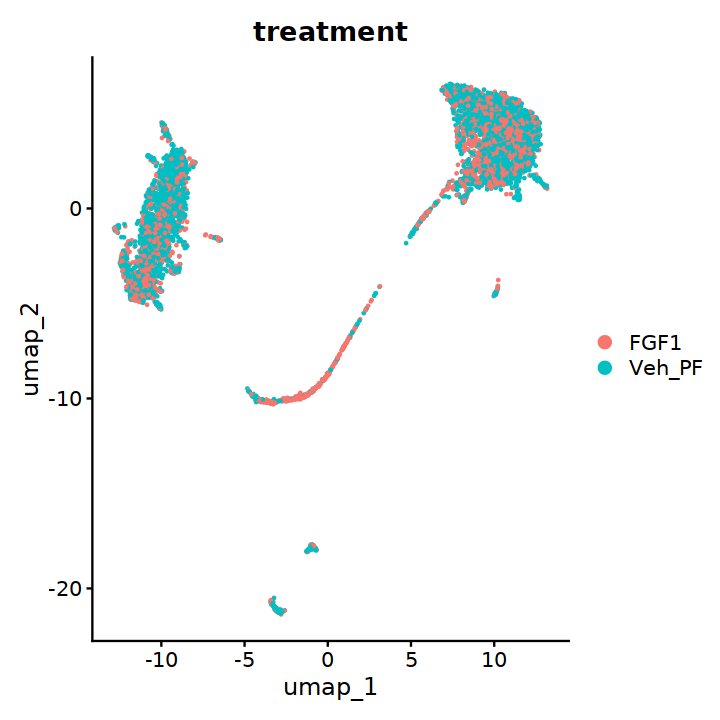

In [36]:
options(repr.plot.width=6, repr.plot.height=6)
DimPlot(obj, reduction = "umap", group.by='treatment', label=F, repel = T)

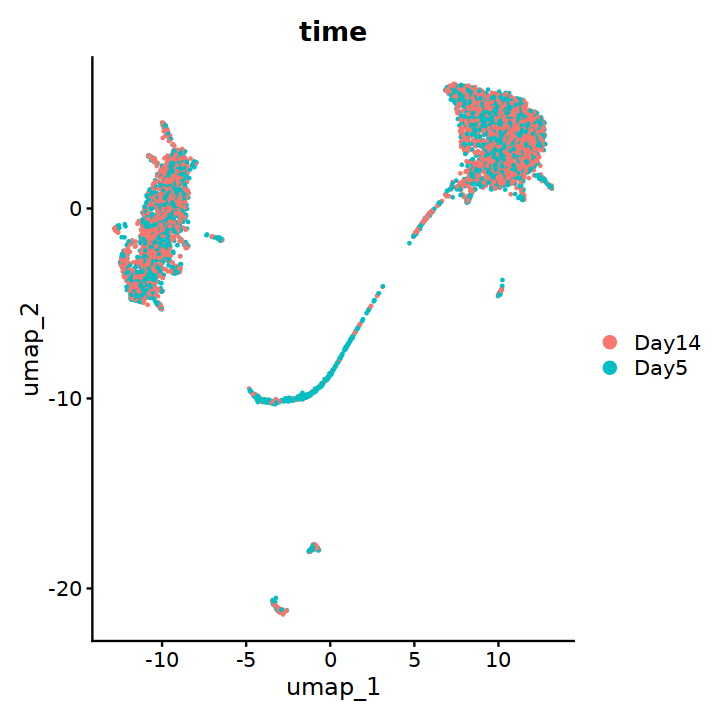

In [37]:
options(repr.plot.width=6, repr.plot.height=6)
DimPlot(obj, reduction = "umap", group.by='time', label=F, repel = T)

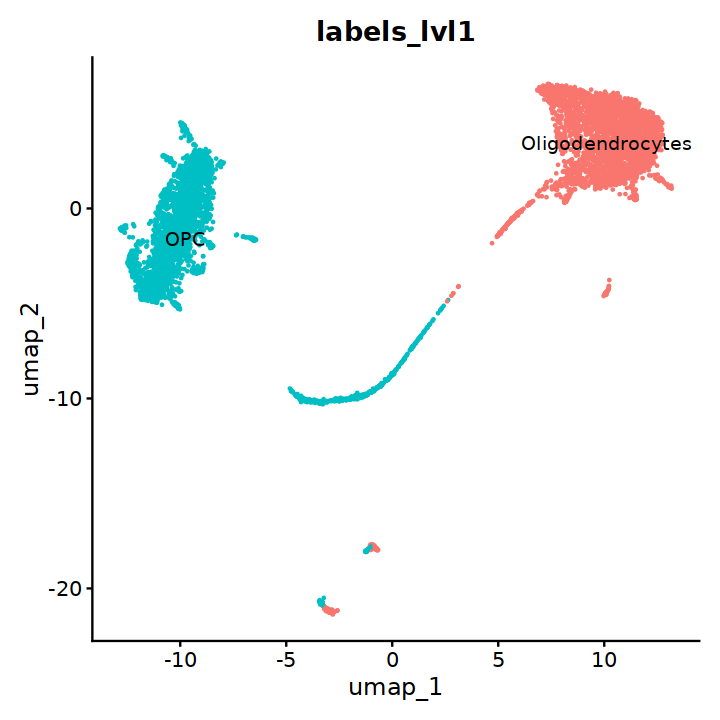

In [38]:
options(repr.plot.width=6, repr.plot.height=6)
DimPlot(obj, reduction = "umap", group.by='labels_lvl1', label=T) + NoLegend()

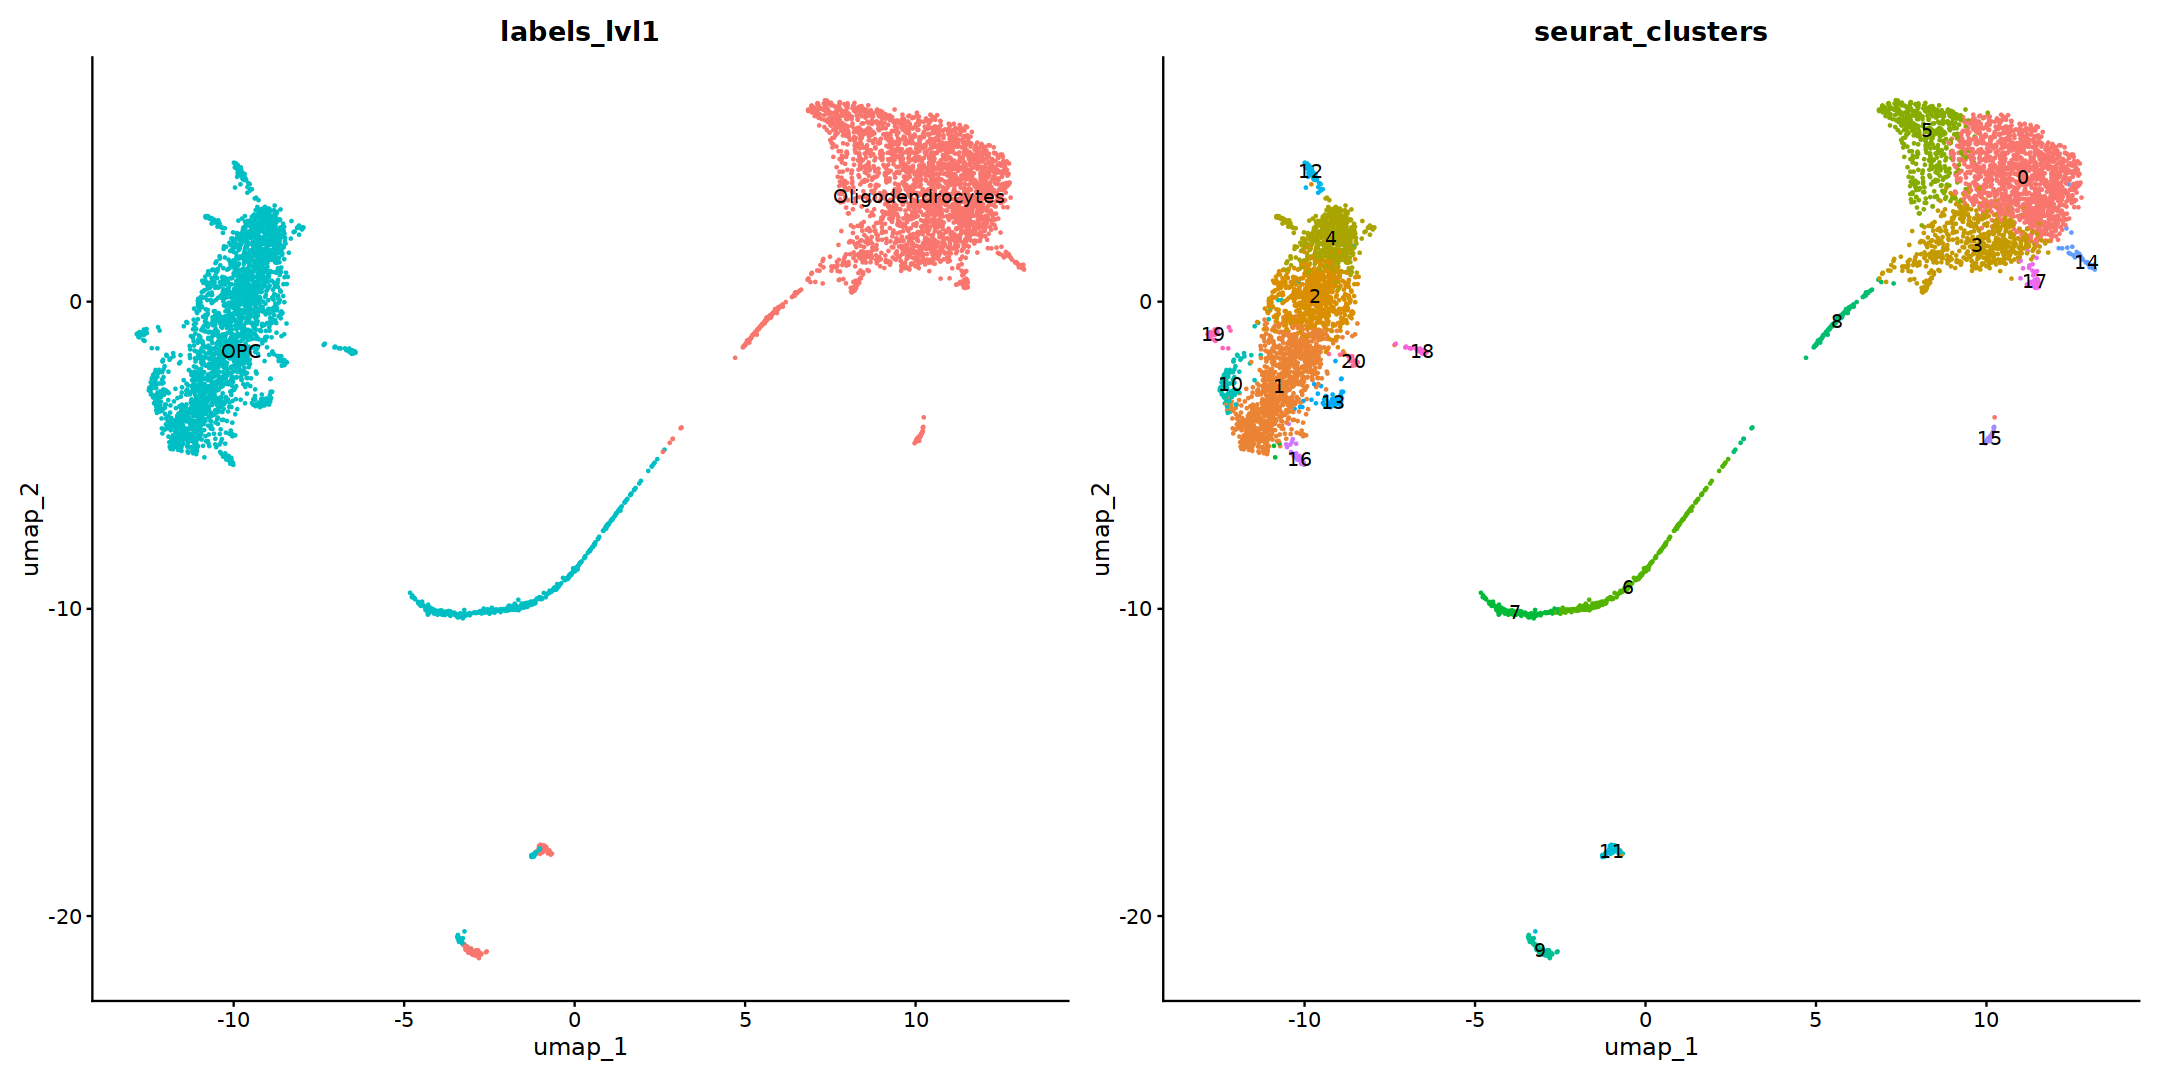

In [39]:
options(repr.plot.width=18, repr.plot.height=9)
p_labels_lvl1 = DimPlot(obj, reduction = "umap", group.by='labels_lvl1', label=T) + NoLegend()
p_seurat_clusters = DimPlot(obj, reduction = "umap", group.by='seurat_clusters', label=T) + NoLegend()
p_labels_lvl1 + p_seurat_clusters